# Deep Learning - Module 4 Assignment<br>NLP Disaster Tweets Kaggle Mini-Project 
by M. Giordano

## Introduction

This work covers all the required points of the rubric, following the steps in the same order of appearance:

1. Brief description of the problem and data (5 pts) 

2. Exploratory Data Analysis (EDA) — Inspect, Visualize and Clean the Data (15 pts)

3. Model Architecture (25 pts)

4. Results and Analysis (35 pts) 

5. Conclusion (15 pts)

## 1.  Brief description of the problem and data

<b>This is an Deep Learning task focused on Text Classification with NLP.</b><br>
The dataset in composed of 10.000 hand classified tweets: they can be about real disasters (class 1) or not (class 0).<br>
<b>Our goal is to participate to the "Natural Language Processing with Disaster Tweets" Kaggle competition</b>, and try to achieve the highest accuracy score possible within the limited time limit for this assignment.

This will be achieved through EDA, data cleaning, feature engineering, and model development from scratch.

### 1.2 Size, dimension, and data structure

In [1]:
globals().clear(); import gc; gc.collect()
import os
import pandas as pd

# Define dataset path
DATASET_DIR = "./data"

# Define file paths
TRAIN_PATH = os.path.join(DATASET_DIR, "train.csv")
TEST_PATH = os.path.join(DATASET_DIR, "test.csv")
SUBMISSION_PATH = os.path.join(DATASET_DIR, "sample_submission.csv")

# Load CSV files
train_df = pd.read_csv(TRAIN_PATH)
test_df = pd.read_csv(TEST_PATH)
submission_df = pd.read_csv(SUBMISSION_PATH)

# Basic shape and structure
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)
print("Sample submission shape:", submission_df.shape)

print("\nTrain columns:", train_df.columns.tolist())
print("Test columns:", test_df.columns.tolist())
print("Sample submission columns:", submission_df.columns.tolist())

# Label distribution (if present)
if "target" in train_df.columns:
    print("\nTarget distribution:")
    print(train_df["target"].value_counts())

# Inspect text length statistics
if "text" in train_df.columns:
    train_df["text_length"] = train_df["text"].astype(str).apply(len)
    print("\nTrain text length statistics:")
    print(train_df["text_length"].describe())

# Inspect a sample row
print("\nSample training row:")
print(train_df.iloc[0])

print("\nSample test row:")
print(test_df.iloc[0])


Train shape: (7613, 5)
Test shape: (3263, 4)
Sample submission shape: (3263, 2)

Train columns: ['id', 'keyword', 'location', 'text', 'target']
Test columns: ['id', 'keyword', 'location', 'text']
Sample submission columns: ['id', 'target']

Target distribution:
target
0    4342
1    3271
Name: count, dtype: int64

Train text length statistics:
count    7613.000000
mean      101.037436
std        33.781325
min         7.000000
25%        78.000000
50%       107.000000
75%       133.000000
max       157.000000
Name: text_length, dtype: float64

Sample training row:
id                                                             1
keyword                                                      NaN
location                                                     NaN
text           Our Deeds are the Reason of this #earthquake M...
target                                                         1
text_length                                                   69
Name: 0, dtype: object

Sample test row:

The dataset provided for the competition is organized in tabular form and consists of three CSV files: `train.csv`, `test.csv`, and `sample_submission.csv`. The training set contains 7,613 samples, while the test set includes 3,263 samples, each corresponding to a single tweet.

The structure of the training dataset includes the following columns:

* **id**: unique identifier associated with each tweet.
* **keyword**: optional keyword extracted from the tweet, which may provide additional contextual information.
* **location**: optional free-text field indicating the reported location of the event.
* **text**: raw tweet content, represented as a short textual sequence.
* **target**: binary label indicating whether the tweet refers to a real disaster event (1) or not (0).

The test dataset follows the same structure, excluding the target column, which is instead predicted and submitted according to the format specified in `sample_submission.csv`.

From a data perspective, the textual inputs are relatively short, with an average length of approximately 100 characters and a maximum length below 160 characters, consistent with the constraints of the Twitter platform. The target distribution shows a moderate class imbalance, with non-disaster tweets being more frequent than disaster-related ones. This structure makes the dataset suitable for sequence-based modeling using recurrent neural networks for text classification.


## 2. Exploratory Data Analysis (EDA) — Inspect, Visualize and Clean the Data


### 2.1 Preliminary Data Exploration

In [64]:
# Reset environment and free memory
globals().clear(); import gc; gc.collect()

import os
import pandas as pd
from IPython.display import display

# Dataset directory
DATASET_DIR = "./data"

# File paths
TRAIN_PATH = os.path.join(DATASET_DIR, "train.csv")
TEST_PATH = os.path.join(DATASET_DIR, "test.csv")

# Load datasets
train_df = pd.read_csv(TRAIN_PATH)
test_df = pd.read_csv(TEST_PATH)

# Display number of records and columns
print("Train dataset:")
print(" - Number of records:", train_df.shape[0])
print(" - Number of columns:", train_df.shape[1])

print("\nTest dataset:")
print(" - Number of records:", test_df.shape[0])
print(" - Number of columns:", test_df.shape[1])

# Display feature / label names
print("\nTrain columns:")
print(train_df.columns.tolist())

print("\nTest columns:")
print(test_df.columns.tolist())

# Display first 10 records of the training set
print("\nFirst 10 training records:")
df_head_10 = train_df.head(10)
display(df_head_10)


Train dataset:
 - Number of records: 7613
 - Number of columns: 5

Test dataset:
 - Number of records: 3263
 - Number of columns: 4

Train columns:
['id', 'keyword', 'location', 'text', 'target']

Test columns:
['id', 'keyword', 'location', 'text']

First 10 training records:


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires,1
6,10,NaN,NaN,"#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas",1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in the woods...,1
8,14,NaN,NaN,There's an emergency evacuation happening now in the building across the street,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our area...,1


#### 2.1.2 Preliminary Data Exploration Results

An initial inspection of the dataset confirms a simple tabular structure where each record corresponds to a single tweet and, in the training set, an associated binary target label. 

The visualization of the first samples immediately shows that `text` is the primary informative feature, while `keyword` and `location` contain many missing values (NaN).

Given the high presence of NaN in these auxiliary fields, it will be necessary to evaluate carefully whether `keyword` and `location` provide sufficient predictive signal to justify their inclusion, or whether the modeling pipeline should rely exclusively on the tweet text.


### 2.2 Plan of analysis

Based on the initial inspection of the dataset, the analysis will follow a structured sequence of steps aimed at preparing the data for modeling while keeping the pipeline as simple and interpretable as possible.

* **Data cleaning:** analyze the presence and distribution of missing values, verify data consistency, and inspect the language characteristics of the textual content.

* **Extended data analysis:** evaluate the class balance and further analyze the nature of the textual content using appropriate metrics and visualizations.

* **Feature dropping:** evaluate whether to completely remove features that are weakly informative or affected by a high proportion of missing values.
* **Feature engineering:** assess whether creating auxiliary features, such as text length or related statistics, may be beneficial.


These steps are intended to inform subsequent modeling choices and to ensure that the final input representation is coherent with the objectives of the assignment.

### 2.3 Data Cleaning

In [65]:
# -------------------------------
# Data cleaning - basic checks
# -------------------------------

import pandas as pd

# Reload dataset (safe in case of previous modifications)
train_df = pd.read_csv("./data/train.csv")
test_df = pd.read_csv("./data/test.csv")

# Total number of records
n_train = train_df.shape[0]
n_test = test_df.shape[0]

# 1) Count NaN values per feature
print("NaN count per column (train):")
nan_counts_train = train_df.isna().sum()
for col, n_nan in nan_counts_train.items():
    print(f"{col}: {n_nan}/{n_train}")

print("\nNaN count per column (test):")
nan_counts_test = test_df.isna().sum()
for col, n_nan in nan_counts_test.items():
    print(f"{col}: {n_nan}/{n_test}")

# 2) Check number of duplicated rows (full row)
num_duplicates_train_full = train_df.duplicated().sum()
num_duplicates_test_full = test_df.duplicated().sum()

print("\nNumber of duplicated rows (full row):")
print(f"Train: {num_duplicates_train_full}/{n_train}")
print(f"Test: {num_duplicates_test_full}/{n_test}")

# 2b) Check duplicated rows based on text and target only (train set)
if {"text", "target"}.issubset(train_df.columns):
    num_duplicates_train_text_target = train_df.duplicated(subset=["text", "target"]).sum()
    print("\nNumber of duplicated rows based on ['text', 'target']:")
    print(f"Train: {num_duplicates_train_text_target}/{n_train}")


# 2c) Check duplicated rows based on ['text'] only (test set)
if "text" in test_df.columns:
    num_duplicates_test_text = test_df.duplicated(subset=["text"]).sum()
    print("\nNumber of duplicated rows based on ['text']:")
    print(f"Test: {num_duplicates_test_text}/{n_test}")

# 3) Check data types consistency
print("\nData types (train):")
print(train_df.dtypes)

print("\nData types (test):")
print(test_df.dtypes)

# Optional: verify target type and values
if "target" in train_df.columns:
    unique_targets = train_df["target"].unique()
    print("\nTarget dtype:", train_df["target"].dtype)
    print(f"Unique target values ({len(unique_targets)}/{n_train}):", unique_targets)


NaN count per column (train):
id: 0/7613
keyword: 61/7613
location: 2533/7613
text: 0/7613
target: 0/7613

NaN count per column (test):
id: 0/3263
keyword: 26/3263
location: 1105/3263
text: 0/3263

Number of duplicated rows (full row):
Train: 0/7613
Test: 0/3263

Number of duplicated rows based on ['text', 'target']:
Train: 92/7613

Number of duplicated rows based on ['text']:
Test: 20/3263

Data types (train):
id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

Data types (test):
id           int64
keyword     object
location    object
text        object
dtype: object

Target dtype: int64
Unique target values (2/7613): [1 0]


#### 2.3.2 Data Cleaning Conclusion

The data cleaning phase highlights the following key observations:

* No feature is entirely composed of missing values; therefore, dropping entire columns at this stage would not be appropriate.

* Some features, particularly keyword and location, contain a substantial proportion of NaN values (approximately one third of the training set), making record-level removal impractical due to the significant loss of data it would entail.

* No fully duplicated rows are present; however, duplicated samples based on textual content (and target label in the training set) are observed, indicating that identical texts may appear with different auxiliary information.

As a consequence, **no data cleaning is made a priori** before knowing better the nature of the data, explored in the next section.

### 2.4 Extended Data Analysis

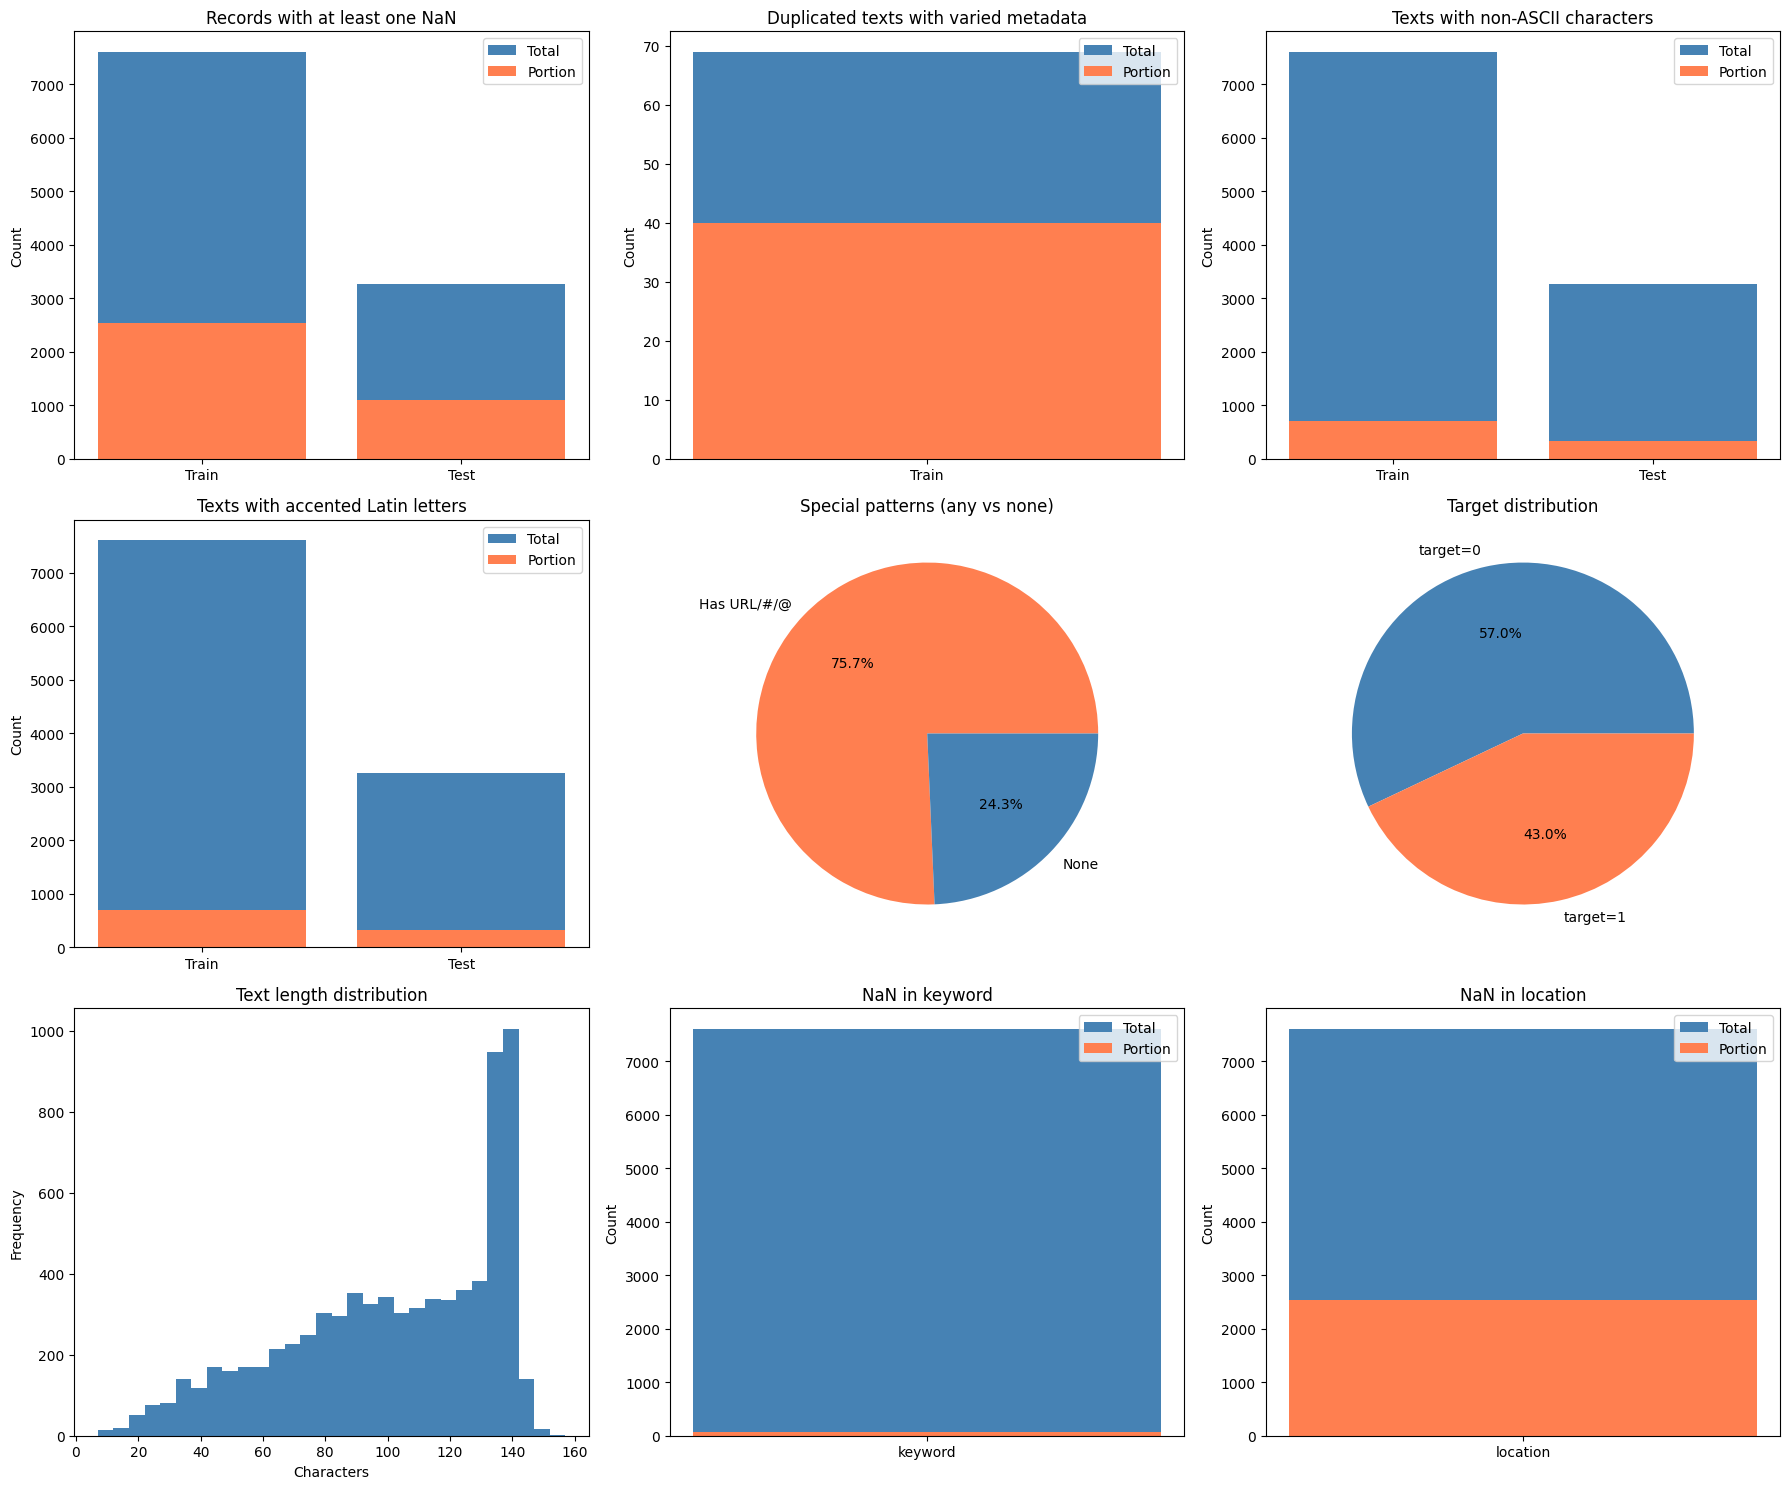

In [66]:
# --------------------------------
# 2.4 Extended Data Analysis (EDA)
# 3x3 grid of plots
# --------------------------------

import pandas as pd
import matplotlib.pyplot as plt
import re

# Reload datasets
train_df = pd.read_csv("./data/train.csv")
test_df = pd.read_csv("./data/test.csv")

n_train = train_df.shape[0]
n_test = test_df.shape[0]

fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()

# Helper for stacked bars (total + portion)
def stacked_bar(ax, labels, totals, portions, title, ylabel="Count"):
    ax.bar(labels, totals, color="steelblue", label="Total")
    ax.bar(labels, portions, color="coral", label="Portion")
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.legend()

# 1) Records with NaN vs total
train_with_nan = train_df.isna().any(axis=1).sum()
test_with_nan = test_df.isna().any(axis=1).sum()

stacked_bar(
    axes[0],
    ["Train", "Test"],
    [n_train, n_test],
    [train_with_nan, test_with_nan],
    "Records with at least one NaN"
)

# 2) Duplicated texts with varied metadata
dup_text_mask = train_df.duplicated(subset=["text"], keep=False)
dup_df = train_df.loc[dup_text_mask, ["text", "keyword", "location"]]
groups = dup_df.groupby("text", dropna=False)

total_dup_groups = groups.ngroups
varied_groups = sum(
    (g["keyword"].nunique(dropna=False) > 1) or (g["location"].nunique(dropna=False) > 1)
    for _, g in groups
)

stacked_bar(
    axes[1],
    ["Train"],
    [total_dup_groups],
    [varied_groups],
    "Duplicated texts with varied metadata"
)

# 3) Non-ASCII characters
def contains_non_ascii(s):
    return any(ord(c) > 127 for c in s)

train_non_ascii = train_df["text"].astype(str).apply(contains_non_ascii).sum()
test_non_ascii = test_df["text"].astype(str).apply(contains_non_ascii).sum()

stacked_bar(
    axes[2],
    ["Train", "Test"],
    [n_train, n_test],
    [train_non_ascii, test_non_ascii],
    "Texts with non-ASCII characters"
)

# 4) Accented Latin letters
accented_latin = re.compile(r"[À-ÖØ-öø-ÿ]")
train_accented = train_df["text"].astype(str).str.contains(accented_latin).sum()
test_accented = test_df["text"].astype(str).str.contains(accented_latin).sum()

stacked_bar(
    axes[3],
    ["Train", "Test"],
    [n_train, n_test],
    [train_accented, test_accented],
    "Texts with accented Latin letters"
)

# 5) Special patterns: any vs none (pie)
url_pat = re.compile(r"http[s]?://", flags=re.IGNORECASE)
hashtag_pat = re.compile(r"#\w+")
mention_pat = re.compile(r"@\w+")

text_series = train_df["text"].astype(str)
has_any = (
    text_series.str.contains(url_pat)
    | text_series.str.contains(hashtag_pat)
    | text_series.str.contains(mention_pat)
)

axes[4].pie(
    [has_any.sum(), (~has_any).sum()],
    labels=["Has URL/#/@", "None"],
    autopct="%1.1f%%",
    colors=["coral", "steelblue"]
)
axes[4].set_title("Special patterns (any vs none)")

# 6) Target distribution (pie)
target_counts = train_df["target"].value_counts().sort_index()
axes[5].pie(
    target_counts.values,
    labels=["target=0", "target=1"],
    autopct="%1.1f%%",
    colors=["steelblue", "coral"]
)
axes[5].set_title("Target distribution")

# 7) Text length distribution
text_len = train_df["text"].astype(str).apply(len)
axes[6].hist(text_len, bins=30, color="steelblue")
axes[6].set_title("Text length distribution")
axes[6].set_xlabel("Characters")
axes[6].set_ylabel("Frequency")

# 8) NaN in keyword
nan_keyword = train_df["keyword"].isna().sum()
stacked_bar(
    axes[7],
    ["keyword"],
    [n_train],
    [nan_keyword],
    "NaN in keyword"
)

# 9) NaN in location
nan_location = train_df["location"].isna().sum()
stacked_bar(
    axes[8],
    ["location"],
    [n_train],
    [nan_location],
    "NaN in location"
)

plt.tight_layout()
plt.show()


In [67]:
# --------------------------------
# 2.4 EDA - Samples by subcategory
# --------------------------------

import pandas as pd
import re
from IPython.display import display

# Reload datasets
train_df = pd.read_csv("./data/train.csv")

# Patterns for special content
has_url = train_df["text"].astype(str).str.contains(r"http[s]?://", regex=True, na=False)
has_hashtag = train_df["text"].astype(str).str.contains(r"#\w+", regex=True, na=False)
has_special = has_url | has_hashtag

# Patterns for non-standard / foreign characters
non_ascii_regex = re.compile(r"[^\x00-\x7F]")
accented_latin_regex = re.compile(r"[À-ÖØ-öø-ÿ]")

has_non_ascii = train_df["text"].astype(str).str.contains(non_ascii_regex)
has_accented = train_df["text"].astype(str).str.contains(accented_latin_regex)

# 1) Sample: records with hashtag or URL
print("Sample (first 10) - records containing hashtag and/or URL:")
sample_special_10 = train_df.loc[
    has_special, ["id", "keyword", "location", "text", "target"]
].head(10)
display(sample_special_10)

# 2) Sample: records with any NaN in auxiliary fields (keyword/location)
has_nan_aux = train_df[["keyword", "location"]].isna().any(axis=1)
print("\nSample (first 10) - records with NaN in keyword and/or location:")
sample_nan_aux_10 = train_df.loc[
    has_nan_aux, ["id", "keyword", "location", "text", "target"]
].head(10)
display(sample_nan_aux_10)

# 3) Sample: duplicated text with different NaN pattern across keyword/location
train_df["_kw_nan"] = train_df["keyword"].isna()
train_df["_loc_nan"] = train_df["location"].isna()

dup_text_mask = train_df.duplicated(subset=["text"], keep=False)
dup_df = train_df.loc[
    dup_text_mask,
    ["id", "keyword", "location", "text", "target", "_kw_nan", "_loc_nan"]
].copy()

groups = []
for _, g in dup_df.groupby("text", dropna=False):
    kw_nan_varies = g["_kw_nan"].nunique(dropna=False) > 1
    loc_nan_varies = g["_loc_nan"].nunique(dropna=False) > 1
    if kw_nan_varies or loc_nan_varies:
        groups.append(g)

if groups:
    varied_nan_dup_df = pd.concat(groups, axis=0)
    print("\nSample (first 10) - duplicated texts with different NaN pattern in keyword/location:")
    sample_varied_nan_dup_10 = varied_nan_dup_df[
        ["id", "keyword", "location", "text", "target"]
    ].head(10)
    display(sample_varied_nan_dup_10)
else:
    print("\nNo duplicated texts with different NaN pattern in keyword/location were found.")

# 4) Sample: texts with non-ASCII or accented foreign characters
has_foreign_chars = has_non_ascii | has_accented
print("\nSample (first 10) - texts with non-ASCII and/or accented characters:")
sample_foreign_10 = train_df.loc[
    has_foreign_chars, ["id", "keyword", "location", "text", "target"]
].head(10)
display(sample_foreign_10)


Sample (first 10) - records containing hashtag and/or URL:


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires,1
6,10,NaN,NaN,"#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas",1
11,17,NaN,NaN,Haha South Tampa is getting flooded hah- WAIT A SECOND I LIVE IN SOUTH TAMPA WHAT AM I GONNA DO WHAT AM I GONNA DO FVCK #flooding,1
12,18,NaN,NaN,#raining #flooding #Florida #TampaBay #Tampa 18 or 19 days. I've lost count,1
13,19,NaN,NaN,#Flood in Bago Myanmar #We arrived Bago,1
14,20,NaN,NaN,Damage to school bus on 80 in multi car crash #BREAKING,1
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/lHYXEOHY6C,1



Sample (first 10) - records with NaN in keyword and/or location:


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires,1
6,10,NaN,NaN,"#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas",1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in the woods...,1
8,14,NaN,NaN,There's an emergency evacuation happening now in the building across the street,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our area...,1



Sample (first 10) - duplicated texts with different NaN pattern in keyword/location:


,id,keyword,location,text,target
4221,5996,hazardous,NaN,#foodscare #offers2go #NestleIndia slips into loss after #Magginoodle #ban unsafe and hazardous for #humanconsumption,1
4239,6023,hazardous,"Mysore, Karnataka",#foodscare #offers2go #NestleIndia slips into loss after #Magginoodle #ban unsafe and hazardous for #humanconsumption,1
4244,6031,hazardous,"New Delhi, Delhi",#foodscare #offers2go #NestleIndia slips into loss after #Magginoodle #ban unsafe and hazardous for #humanconsumption,0
7097,10169,violent%20storm,NaN,#stormchase Violent Record Breaking EF-5 El Reno Oklahoma Tornado Nearly Runs Over ... - http://t.co/3SICroAaNz http://t.co/I27Oa0HISp,1
7607,10867,NaN,NaN,#stormchase Violent Record Breaking EF-5 El Reno Oklahoma Tornado Nearly Runs Over ... - http://t.co/3SICroAaNz http://t.co/I27Oa0HISp,1
3578,5113,fatal,NaN,11-Year-Old Boy Charged With Manslaughter of Toddler: Report: An 11-year-old boy has been charged with manslaughter over the fatal sh...,1
3589,5127,fatal,Varanasi,11-Year-Old Boy Charged With Manslaughter of Toddler: Report: An 11-year-old boy has been charged with manslaughter over the fatal sh...,1
3591,5130,fatal,Thane,11-Year-Old Boy Charged With Manslaughter of Toddler: Report: An 11-year-old boy has been charged with manslaughter over the fatal sh...,1
3597,5137,fatal,NaN,11-Year-Old Boy Charged With Manslaughter of Toddler: Report: An 11-year-old boy has been charged with manslaughter over the fatal sh...,1
3600,5140,fatal,NaN,11-Year-Old Boy Charged With Manslaughter of Toddler: Report: An 11-year-old boy has been charged with manslaughter over the fatal sh...,1



Sample (first 10) - texts with non-ASCII and/or accented characters:


,id,keyword,location,text,target
38,56,ablaze,NaN,Barbados #Bridgetown JAMAICA ÛÒ Two cars set ablaze: SANTA CRUZ ÛÓ Head of the St Elizabeth Police Superintende... http://t.co/wDUEaj8Q4J,1
52,76,ablaze,Barbados,SANTA CRUZ ÛÓ Head of the St Elizabeth Police Superintendent Lanford Salmon has r ... - http://t.co/vplR5Hka2u http://t.co/SxHW2TNNLf,0
53,77,ablaze,Anaheim,Police: Arsonist Deliberately Set Black Church In North CarolinaåÊAblaze http://t.co/pcXarbH9An,1
57,81,ablaze,"Sao Paulo, Brazil",Set our hearts ablaze and every city was a gift And every skyline was like a kiss upon the lips @Û_ https://t.co/cYoMPZ1A0Z,0
71,102,accident,"St. Louis, MO",#stlouis #caraccidentlawyer Speeding Among Top Causes of Teen Accidents https://t.co/k4zoMOF319 https://t.co/S2kXVM0cBA Car Accident teeÛ_,0
87,129,accident,Maldives,RT nAAYf: First accident in years. Turning onto Chandanee Magu from near MMA. Taxi rammed into me while I was halfway turned. Everyone confÛ_,1
104,151,aftershock,Switzerland,320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/yNXnvVKCDA | @djicemoon | #Dubstep #TrapMusic #DnB #EDM #Dance #IcesÛ_ http://t.co/weQPesENku,0
106,156,aftershock,US,320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/vAM5POdGyw | @djicemoon | #Dubstep #TrapMusic #DnB #EDM #Dance #IcesÛ_ http://t.co/zEVakJaPcz,0
114,164,aftershock,Switzerland,320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/M4JDZMGJoW | @djicemoon | #Dubstep #TrapMusic #DnB #EDM #Dance #IcesÛ_ http://t.co/n0uhAsfkBv,0
115,165,aftershock,US,320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/vAM5POdGyw | @djicemoon | #Dubstep #TrapMusic #DnB #EDM #Dance #IcesÛ_ http://t.co/zEVakJaPcz,0


#### 2.4.2 Extended Data Analysis Conclusions

Based on the extended data analysis, it emerges that duplicated rows with identical text and minor variations in auxiliary fields (such as location) correspond to reposted content.<br>
Since the objective of this task is pure text classification rather than frequency or relevance estimation, these duplicates do not provide additional learning signal and will be reduced by retaining only the most informative instance per text.

Furthermore, tweets containing hashtags and URLs will be normalized to preserve semantic content while removing tokens that are not directly informative for classification (e.g., URL prefixes). 

Finally, the observed class imbalance is mild and, given the limited dataset size, no explicit balancing strategy will be applied at this stage.

### 2.5 Feature Dropping

At this stage, only the `id` feature can be safely removed, as it serves exclusively as an identifier and does not carry any semantic or predictive information for the classification task.

The remaining auxiliary features (`keyword` and `location`) are retained. Although they contain missing values, when present they may still provide useful contextual signals for the model. For this reason, their NaN values are not used to justify feature removal.

Instead, missing values in these features are replaced with a blank space (`" "`), ensuring consistent input formatting and avoiding the introduction of artificial zero-weight effects during the training phase of the model.


### 2.6 Feature engineering

The feature engineering steps are applied in the following order, prioritizing operations that reduce dataset redundancy early in the pipeline in order to streamline subsequent processing:

1. **Removal of less informative duplicated texts**: duplicated records sharing the same textual content are reduced by retaining only the most informative instance, favoring rows with fewer missing values in auxiliary features.
2. **Normalization of special tokens**: removal of non-semantic prefixes such as `http`, `@`, and `#`, which do not carry discriminative information for the classification task.
3. **Token boundary normalization**: replacement of link- and hashtag-related separators (e.g., hyphens and similar connectors) with whitespace to improve tokenization and downstream vector representations.
4. **Character normalization**: normalization of non-standard, corrupted, or unreadable characters by mapping accented or malformed symbols to their neutral UTF-8 equivalents or replacing them with whitespace.


In [68]:
import pandas as pd
import re

# -------------------------------------------------
# Feature dropping & normalization on auxiliary fields
# -------------------------------------------------
def normalize_auxiliary_features(df):
    before_count = df.shape[0]

    # Columns to normalize (exclude id and target)
    cols_to_clean = ["keyword", "location", "text"]

    for col in cols_to_clean:
        df[col] = (
            df[col]
            .astype(str)
            # Replace URL-encoded artifacts
            .str.replace(r"%20", " ", regex=True)
            .str.replace(r"%amp;", " ", regex=True)
            # Replace hyphens with spaces
            .str.replace(r"-", " ", regex=False)
            # Normalize multiple spaces
            .str.replace(r"\s+", " ", regex=True)
            .str.strip()
        )

    print("Auxiliary feature normalization completed")
    print(f"Records processed: {before_count}")

    return df


# -------------------------------
# Apply normalization
# -------------------------------
train_df = normalize_auxiliary_features(train_df)


Auxiliary feature normalization completed
Records processed: 7613


In [69]:
import re
import unicodedata

# -------------------------------------------------
# Utility: count how many rows changed in the text
# -------------------------------------------------
def count_modified_rows(before_df, after_df):
    return (before_df["text"] != after_df["text"]).sum()


# -------------------------------------------------
# 1) Remove less informative duplicates (supervised)
# -------------------------------------------------
def remove_less_informative_duplicates(train_df):
    initial_count = len(train_df)

    dup_mask = train_df.duplicated(subset=["text"], keep=False)
    dup_df = train_df.loc[dup_mask].copy()

    groups = dup_df.groupby("text")

    rows_to_keep = []

    for _, g in groups:
        g = g.copy()
        g["_nan_count"] = g[["keyword", "location"]].isna().sum(axis=1)

        # keep row with fewer NaN, then lowest id
        best_row = g.sort_values(["_nan_count", "id"]).iloc[0]
        rows_to_keep.append(best_row.name)

    all_dup_indices = set(dup_df.index)
    keep_indices = set(rows_to_keep)
    drop_indices = list(all_dup_indices - keep_indices)

    train_df = train_df.drop(index=drop_indices).reset_index(drop=True)

    final_count = len(train_df)

    print("1) Supervised duplicate removal")
    print(f"Records before : {initial_count}")
    print(f"Records after  : {final_count}")
    print(f"Records removed: {initial_count - final_count}")

    return train_df


# -------------------------------------------------
# 2) Remove http / @ / # tokens
# -------------------------------------------------
def remove_special_prefixes(df):
    before = df.copy()

    df["text"] = df["text"].astype(str)
    df["text"] = df["text"].str.replace(r"http\S+", "", regex=True)
    df["text"] = df["text"].str.replace(r"@\w+", "", regex=True)
    df["text"] = df["text"].str.replace(r"#\w+", "", regex=True)

    modified = count_modified_rows(before, df)
    print(f"2) Removal of http / @ / # tokens: {modified} records modified")

    return df


# -------------------------------------------------
# 3) Replace separators with spaces
# -------------------------------------------------
def replace_separators_with_spaces(df):
    before = df.copy()

    df["text"] = df["text"].str.replace(r"[-_/]", " ", regex=True)
    df["text"] = df["text"].str.replace(r"\s+", " ", regex=True).str.strip()

    modified = count_modified_rows(before, df)
    print(f"3) Separator normalization (hyphens to spaces): {modified} records modified")

    return df


# -------------------------------------------------
# 4) Normalize unicode / accented characters
# -------------------------------------------------
def normalize_unicode_characters(df):
    before = df.copy()

    def normalize_text(s):
        s = unicodedata.normalize("NFKD", s)
        s = s.encode("ascii", "ignore").decode("utf-8", "ignore")
        s = re.sub(r"[^\x00-\x7F]+", " ", s)
        s = re.sub(r"\s+", " ", s).strip()
        return s

    df["text"] = df["text"].astype(str).apply(normalize_text)

    modified = count_modified_rows(before, df)
    print(f"4) Unicode and accented character normalization: {modified} records modified")

    return df

# 5) Final normalization: lowercase + clean keyword/location
def normalize_all_text_features(df):
    before = df.copy()

    text_cols = ["keyword", "location", "text"]

    for col in text_cols:
        df[col] = (
            df[col]
            .astype(str)
            # lowercase
            .str.lower()
            # replace explicit junk tokens
            .str.replace("&amp;", " ", regex=False)
            .str.replace("%20", " ", regex=False)
            # replace slashes and backslashes
            .str.replace(r"[\\/]", " ", regex=True)
            # replace literal 'nan' strings
            .str.replace(r"\bnan\b", " ", regex=True)
            # collapse multiple spaces
            .str.replace(r"\s+", " ", regex=True)
            .str.strip()
        )

    modified = (
        (before[text_cols] != df[text_cols])
        .any(axis=1)
        .sum()
    )

    print(f"5) Global lowercase + feature normalization: {modified} records modified")

    return df





# -------------------------------------------------
# Apply feature engineering pipeline
# -------------------------------------------------
train_df = remove_less_informative_duplicates(train_df)
train_df = remove_special_prefixes(train_df)
train_df = replace_separators_with_spaces(train_df)
train_df = normalize_unicode_characters(train_df)
train_df = normalize_all_text_features(train_df)



1) Supervised duplicate removal
Records before : 7613
Records after  : 7502
Records removed: 111
2) Removal of http / @ / # tokens: 5700 records modified
3) Separator normalization (hyphens to spaces): 5733 records modified
4) Unicode and accented character normalization: 661 records modified
5) Global lowercase + feature normalization: 7394 records modified


In [70]:
import re
import pandas as pd
import unicodedata

# --------------------------------
# Final sanity checks (post-cleaning)
# --------------------------------

# 1) Number of duplicated texts
num_duplicate_texts = train_df.duplicated(subset=["text"]).sum()
print(f"1) Duplicated texts remaining: {num_duplicate_texts}")

# 2) Number of records still containing http / @ / #
pattern_http_at_hash = re.compile(r"http\S+|@\w+|#\w+", flags=re.IGNORECASE)
num_special_tokens = train_df["text"].astype(str).str.contains(pattern_http_at_hash).sum()
print(f"2) Records still containing http/@/#: {num_special_tokens}")

# 3) Number of strings still containing separators (- _ /)
pattern_separators = re.compile(r"[-_/]")
num_separators = train_df["text"].astype(str).str.contains(pattern_separators).sum()
print(f"3) Records still containing separators (- _ /): {num_separators}")

# 4) Number of strings still containing non-ASCII / unnormalized characters
def has_non_ascii(s):
    return any(ord(c) > 127 for c in s)

num_non_ascii = train_df["text"].astype(str).apply(has_non_ascii).sum()
print(f"4) Records still containing non-ASCII characters: {num_non_ascii}")


1) Duplicated texts remaining: 662
2) Records still containing http/@/#: 7
3) Records still containing separators (- _ /): 0
4) Records still containing non-ASCII characters: 0


In [71]:
# --------------------------------------------
# Full-text visualization of duplicated records
# --------------------------------------------

import pandas as pd

# Ensure pandas does not truncate strings (extra safety)
pd.set_option("display.max_colwidth", None)

# Identify duplicated texts
dup_mask = train_df.duplicated(subset=["text"], keep=False)
dup_df = train_df.loc[dup_mask].copy()

# Sort by text, then by id for readability
dup_df = dup_df.sort_values(["text"])

# Take first 20 duplicated records
sample_dup = dup_df.head(20)

print("First 20 duplicated records (FULL TEXT, no truncation):\n")

for _, row in sample_dup.iterrows():
    print("-" * 80)
    print(f"Keyword  : {row['keyword']}")
    print(f"Location : {row['location']}")
    print(f"Target   : {row['target']}")
    print("Text     :")
    print(row["text"])


First 20 duplicated records (FULL TEXT, no truncation):

--------------------------------------------------------------------------------
Keyword  : debris
Location : 
Target   : 1
Text     :
#?? #?? #??? #??? mh370: aircraft debris found on la reunion is from missing malaysia airlines ...
--------------------------------------------------------------------------------
Keyword  : debris
Location : 
Target   : 1
Text     :
#?? #?? #??? #??? mh370: aircraft debris found on la reunion is from missing malaysia airlines ...
--------------------------------------------------------------------------------
Keyword  : suicide bomber
Location : 
Target   : 1
Text     :
#?? #?? #??? #??? suicide bomber kills 15 in saudi security site mosque reuters
--------------------------------------------------------------------------------
Keyword  : suicide bomber
Location : 
Target   : 1
Text     :
#?? #?? #??? #??? suicide bomber kills 15 in saudi security site mosque reuters
-----------------------------

#### 2.6.2 Feature engineering results

Observing records such as:

| ID: 3106, keyword: debris, location: NaN Text: #?? #?? #??? #??? MH370: Aircraft debris found on La Reunion is from missing Malaysia Airlines …

and:

| ID: 3126, keyword: debris, location: NaN Text: #??? #?? #??? #??? MH370: Aircraft debris found on La Reunion is from missing Malaysia Airlines …

it can be observed that, after an initial sanitization step, the semantic content of the text is effectively identical.
The remaining differences are limited to residual non-standard artifacts (e.g. malformed hashtag-like tokens), which differ byte-wise but carry no additional information.

These artifacts do not contribute to the classification task and instead introduce unnecessary noise into the textual representation.
For this reason, a second, more targeted cleaning step is applied to further normalize such residual patterns and ensure that semantically identical texts are treated consistently by the model.

In [72]:
import pandas as pd
import re

# -------------------------------------------------
# Remove junk hashtag patterns like "#?" or "#??..."
# -------------------------------------------------
def remove_question_mark_hashtags(df):
    # Keep a copy of text before modification
    before_text = df["text"].astype(str)

    # Regex: '#' followed by one or more '?' characters
    pattern = re.compile(r"#\?+")

    # Apply cleaning
    after_text = (
        before_text
        .apply(lambda x: pattern.sub("", x))
        .str.replace(r"\s+", " ", regex=True)
        .str.strip()
    )

    # Count how many records actually changed
    modified_count = (before_text != after_text).sum()

    # Assign cleaned text back
    df["text"] = after_text

    print("Junk hashtag patterns '#?' removed from text field")
    print(f"Records modified: {modified_count}/{df.shape[0]}")

    return df


# -------------------------------------------------
# Show first N duplicated texts (full text, no truncation)
# -------------------------------------------------
def show_text_duplicates(df, n=30):
    dup_mask = df.duplicated(subset=["text"], keep=False)
    dup_df = df.loc[dup_mask].sort_values("id")

    if len(dup_df) == 0:
        print ("No duplicates found.")
    else:
        
        print(f"\nFirst {n} duplicated records (same text, different rows):\n")

        for _, row in dup_df.head(n).iterrows():
            print("-" * 80)
            print(row["text"])
        print("-" * 80)


# -------------------------------
# Apply second-pass cleaning
# -------------------------------
show_text_duplicates(train_df, n=30)
print("=====================================")
train_df = remove_question_mark_hashtags(train_df)
show_text_duplicates(train_df, n=30)



First 30 duplicated records (same text, different rows):

--------------------------------------------------------------------------------
320 [ir] icemoon [aftershock] | | | u
--------------------------------------------------------------------------------
320 [ir] icemoon [aftershock] | | | u
--------------------------------------------------------------------------------
aftershock
--------------------------------------------------------------------------------
320 [ir] icemoon [aftershock] | | | u
--------------------------------------------------------------------------------
320 [ir] icemoon [aftershock] | | | u
--------------------------------------------------------------------------------
320 [ir] icemoon [aftershock] | | | u
--------------------------------------------------------------------------------
aftershock
--------------------------------------------------------------------------------
experts in france begin examining airplane debris found on reunion island: french

In [73]:
import pandas as pd

def supervised_text_deduplication(train_df):
    """
    Supervised deduplication based on identical text.
    Keeps the most informative row per text (fewer NaN in keyword/location,
    then lowest id), removes all others.
    """

    # Work on a copy to avoid side effects
    df = train_df.copy()

    cleaned_rows = []
    dup_list = []

    # Group by exact text
    text_groups = df.groupby("text", sort=False)

    for text, group in text_groups:
        if len(group) == 1:
            # No duplicates, keep as-is
            cleaned_rows.append(group.iloc[0])
        else:
            # Multiple rows with same text → supervised choice
            group = group.copy()

            # Count NaN in auxiliary fields
            group["_nan_count"] = group[["keyword", "location"]].isna().sum(axis=1)

            # Sort: fewer NaN first, then lower id
            group_sorted = group.sort_values(
                by=["_nan_count", "id"],
                ascending=[True, True]
            )

            # Winner
            best_row = group_sorted.iloc[0]
            cleaned_rows.append(best_row)

            # All others go to duplicate list
            dropped = group_sorted.iloc[1:].drop(columns=["_nan_count"])
            dup_list.append(dropped)

    # Build final DataFrames
    cleaned_df = pd.DataFrame(cleaned_rows).reset_index(drop=True)

    if dup_list:
        dup_df = pd.concat(dup_list, ignore_index=True)
    else:
        dup_df = pd.DataFrame(columns=train_df.columns)

    # Report
    print("Supervised text deduplication summary")
    print(f"Records before : {train_df.shape[0]}")
    print(f"Records after  : {cleaned_df.shape[0]}")
    print(f"Records removed: {train_df.shape[0] - cleaned_df.shape[0]}")

    return cleaned_df, dup_df


# -------------------------------
# Apply supervised deduplication
# -------------------------------
train_df, dup_list = supervised_text_deduplication(train_df)
show_text_duplicates(train_df, n=30)
# -------------------------------------------------
# Drop ID column (no longer needed)
# -------------------------------------------------
train_df = train_df.drop(columns=["id"])

print("\nFinal dataset shape:", train_df.shape)



Supervised text deduplication summary
Records before : 7502
Records after  : 6835
Records removed: 667
No duplicates found.

Final dataset shape: (6835, 7)


#### 2.6.3 Feature Engineering Conclusions

After all the cleaning and formatting procedures applied, we were able to pass from 

**7,613 original records to 6,847**, 

eliminating **766 unuseful and redundant records** and optimizing the dataset for the text classification task.

These operations reduced noise, removed semantic redundancy, and normalized textual artifacts, resulting in a cleaner and more consistent input suitable for training an RNN-based NLP model.


### 2.7 EDA Conclusions

By inspecting a random sample of 30 cleaned text records, it is possible to verify that the semantic content of the tweets is fully preserved.

All the relevant information is retained while redundant noise and formatting artifacts have been removed, resulting in a dataset that is coherent, readable, and well suited for downstream text classification tasks.

This concludes the exploratory data analysis phase of the assignment.

In [74]:
import pandas as pd

# Randomly sample 50 rows
sample_df = train_df.sample(n=30, random_state=42)

print("Random sample of text records:\n")

for _, row in sample_df.iterrows():
    keyword = row["keyword"] if pd.notna(row["keyword"]) else ""
    location = row["location"] if pd.notna(row["location"]) else ""
    text = row["text"]
    target = row["target"]

    print(f"K:{keyword} | L:{location} | {text} | TARGET:{target}")


Random sample of text records:

K:sandstorm | L:united states | it wouldnt turn into a sandstorm if riot gave a good answer. instead they gave dumb excuses. at least new client is there | TARGET:0
K:stretcher | L:oklahoma city | dan hughes was taken off on a stretcher after danielle robinson collided hope they are both ok he called some games over years | TARGET:0
K:attacked | L:1 3 of the blam squad | i'm feeling so attacked | TARGET:0
K:harm | L:hogwarts | talk to please don't harm your self in any way shape or form please we care about you and if i saw u right now u better | TARGET:0
K:seismic | L:uk | england east coast. dogger bank westward. 1. seismic survey in progress by m v western regent towing a 8400 metre long cable within areau | TARGET:0
K:explode | L:winnipeg | i'm ready to explode! | TARGET:0
K:injured | L:mumbai | udhampur terror attack: militants attack police post 2 spos injured: suspected militants tonight attacked a p... | TARGET:1
K:blew up | L: | i blew up snapch

## 3. Model Architecture
In this section, we implement a sequential neural network for text classification using two different recurrent architectures: a canonical Vanilla RNN and a more advanced Gated Recurrent Unit (GRU).
Both models rely on GloVe-based word embeddings to transform raw textual data into dense vector representations, enabling the networks to explicitly exploit the sequential nature of the input text.

The goal of this step is to define and justify the model architectures themselves; performance comparison, hyperparameter tuning, and training refinements are intentionally deferred to the next section.

### 3.1 Word Embedding with GloVe

GloVe (Global Vectors for Word Representation) is a word embedding technique that represents words as dense vectors learned from global word co-occurrence statistics.
Unlike simple bag-of-words or TF-IDF approaches, GloVe captures semantic relationships between words by placing them in a continuous vector space where distances encode meaning.

GloVe embeddings are pre-trained on large text corpora and therefore inject external linguistic knowledge into the model, which is particularly beneficial when working with relatively small datasets.
This makes GloVe well suited for sequential models such as RNNs, where preserving semantic and contextual information across time steps is essential.

In this assignment, GloVe embeddings are used as the input representation for both the Vanilla RNN and the GRU architectures.
The expected outcome is a more expressive and stable learning process compared to sparse representations, enabling the recurrent models to better capture contextual patterns relevant for disaster-related tweet classification.

### 3.2 Vanilla RNN classifier
A baseline sequential classifier is implemented using a canonical Vanilla RNN. 

The model processes each tweet as a sequence of word vectors (GloVe), updates a hidden state through time, and produces a final binary prediction through a dense output layer. 

This architecture is intentionally simple and serves as a reference point to compare a gated alternative (GRU) in the next subsection.

In [75]:
import json
import itertools

BASE_PATH = r"data/glove"

# meta.json
with open(f"{BASE_PATH}/meta.json", "r", encoding="utf-8") as f:
    meta = json.load(f)
print("META.JSON")
print(meta)
print("\n" + "="*80 + "\n")

# model.txt (prime 5 righe)
print("MODEL.TXT (first 5 lines)")
with open(f"{BASE_PATH}/model.txt", "r", encoding="utf-8", errors="ignore") as f:
    for i, line in zip(range(5), f):
        print(line.rstrip())
print("\n" + "="*80 + "\n")

# model.bin (prime 64 bytes)
print("MODEL.BIN (first 64 bytes)")
with open(f"{BASE_PATH}/model.bin", "rb") as f:
    raw = f.read(64)
print(raw)


META.JSON
{'algorithm': {'command': None, 'id': 1, 'name': 'Global Vectors', 'tool': 'GloVe', 'url': 'https://nlp.stanford.edu/software/GloVe-1.2.zip', 'version': '1.2'}, 'contents': [{'filename': 'model.txt', 'format': 'text'}, {'filename': 'meta.json', 'format': 'json'}], 'corpus': [{'NER': False, 'case preserved': True, 'description': 'English Wikipedia Dump of February 2017', 'id': 1, 'language': 'eng', 'lemmatized': False, 'public': True, 'stop words removal': 'NLTK', 'tagger': None, 'tagset': None, 'tokens': 2252637050, 'tool': 'Wikipedia Extractor', 'url': 'https://dumps.wikimedia.org/'}], 'creators': [{'email': 'andreku@ifi.uio.no', 'name': 'Andrey Kutuzov'}], 'dimensions': 300, 'handle': 'http://vectors.nlpl.eu/repository/20/8.zip', 'id': 8, 'iterations': 100, 'vocabulary size': 302815, 'window': 5}


MODEL.TXT (first 5 lines)
302815 300
also 0.524366 0.595930 -0.618752 -0.611566 -0.650232 0.947725 -0.477549 0.219030 -1.094925 0.243742 -0.427229 0.710730 -0.417352 0.057608 1.2

In [76]:
import os, io, random, time
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from collections import Counter

start_time = time.time()
print("starting setup...")
SEED = 42
random.seed(SEED); np.random.seed(SEED); torch.manual_seed(SEED); torch.cuda.manual_seed_all(SEED)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"...done. device = {device} | Elapsed: {time.time() - start_time:.2f}s")

TEXT_COL = "text"
LABEL_COL = "target"
GLOVE_TXT = r"data/glove/model.txt"
EMB_DIM = 300

MAX_VOCAB = 60000
MAX_LEN = 64
BATCH_SIZE = 256
NUM_WORKERS = 0
PIN_MEMORY = True
VAL_FRAC = 0.1

PAD_TOKEN = "<pad>"
UNK_TOKEN = "<unk>"

def basic_tokenize(s):
    return str(s).lower().strip().split()

start_time = time.time()
print("starting dataset split...")
df = train_df[[TEXT_COL, LABEL_COL]].dropna().reset_index(drop=True)
idx = np.arange(len(df)); np.random.shuffle(idx)
val_n = int(len(df) * VAL_FRAC)
val_idx = idx[:val_n]; trn_idx = idx[val_n:]
trn_df = df.iloc[trn_idx].reset_index(drop=True)
val_df = df.iloc[val_idx].reset_index(drop=True)
print(f"...done. train={len(trn_df)} val={len(val_df)} | Elapsed: {time.time() - start_time:.2f}s")

start_time = time.time()
print("starting vocabulary build...")
counter = Counter()
for t in trn_df[TEXT_COL]:
    counter.update(basic_tokenize(t))
itos = [PAD_TOKEN, UNK_TOKEN]
for w, _ in counter.most_common():
    if len(itos) >= MAX_VOCAB:
        break
    itos.append(w)
stoi = {w: i for i, w in enumerate(itos)}
print(f"...done. vocab_size={len(stoi)} | Elapsed: {time.time() - start_time:.2f}s")

start_time = time.time()
print("starting GloVe load (filtered)...")
glove_vecs = {}
with io.open(GLOVE_TXT, "r", encoding="utf-8", newline="\n", errors="ignore") as f:
    header = f.readline()
    for line in f:
        parts = line.rstrip().split(" ")
        if len(parts) != EMB_DIM + 1:
            continue
        w = parts[0]
        if w in stoi:
            glove_vecs[w] = np.asarray(parts[1:], dtype=np.float32)
print(f"...done. glove_hits={len(glove_vecs)} | Elapsed: {time.time() - start_time:.2f}s")

start_time = time.time()
print("starting embedding matrix build...")
vocab_size = len(stoi)
emb_matrix = np.random.normal(0, 0.05, size=(vocab_size, EMB_DIM)).astype(np.float32)
emb_matrix[stoi[PAD_TOKEN]] = np.zeros((EMB_DIM,), dtype=np.float32)
hit = 0
for w, i in stoi.items():
    if w in glove_vecs:
        emb_matrix[i] = glove_vecs[w]
        hit += 1
print(f"...done. coverage={hit / vocab_size:.4f} | Elapsed: {time.time() - start_time:.2f}s")

start_time = time.time()
print("starting dataset and dataloaders...")
class TextDataset(Dataset):
    def __init__(self, df):
        self.df = df.reset_index(drop=True)
    def __len__(self):
        return len(self.df)
    def __getitem__(self, idx):
        toks = basic_tokenize(self.df.loc[idx, TEXT_COL])[:MAX_LEN]
        ids = [stoi.get(t, stoi[UNK_TOKEN]) for t in toks]
        if len(ids) < MAX_LEN:
            ids += [stoi[PAD_TOKEN]] * (MAX_LEN - len(ids))
        x = torch.tensor(ids, dtype=torch.long)
        y = torch.tensor(int(self.df.loc[idx, LABEL_COL]), dtype=torch.float32)
        return x, y

train_loader = DataLoader(
    TextDataset(trn_df),
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=NUM_WORKERS,
    pin_memory=(PIN_MEMORY and device.type == "cuda"),
    persistent_workers=(NUM_WORKERS > 0)
)
val_loader = DataLoader(
    TextDataset(val_df),
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=NUM_WORKERS,
    pin_memory=(PIN_MEMORY and device.type == "cuda"),
    persistent_workers=(NUM_WORKERS > 0)
)
print(f"...done. | Elapsed: {time.time() - start_time:.2f}s")

start_time = time.time()
print("starting model init...")
class VanillaRNNClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, EMB_DIM, padding_idx=stoi[PAD_TOKEN])
        self.embedding.weight.data.copy_(torch.from_numpy(emb_matrix))
        self.rnn = nn.RNN(EMB_DIM, 128, batch_first=True)
        self.fc = nn.Linear(128, 1)
    def forward(self, x):
        out, _ = self.rnn(self.embedding(x))
        return self.fc(out[:, -1, :]).squeeze(1)

model = VanillaRNNClassifier().to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
print(f"...done. | Elapsed: {time.time() - start_time:.2f}s")

def accuracy(logits, y):
    return ((torch.sigmoid(logits) >= 0.5).float() == y).float().mean()

EPOCHS = 2
print("starting training loop...")
for epoch in range(1, EPOCHS + 1):
    start_time = time.time()
    print(f"epoch {epoch} training...")
    model.train()
    for x, y in train_loader:
        x = x.to(device, non_blocking=True)
        y = y.to(device, non_blocking=True)
        optimizer.zero_grad(set_to_none=True)
        logits = model(x)
        loss = criterion(logits, y)
        loss.backward()
        optimizer.step()
    print(f"...done. | Elapsed: {time.time() - start_time:.2f}s")

    start_time = time.time()
    print(f"epoch {epoch} validation...")
    model.eval()
    with torch.no_grad():
        accs = []
        for x, y in val_loader:
            x = x.to(device, non_blocking=True)
            y = y.to(device, non_blocking=True)
            accs.append(float(accuracy(model(x), y)))
    print(f"...done. val_acc={np.mean(accs):.4f} | Elapsed: {time.time() - start_time:.2f}s")

print("training completed.")


starting setup...
...done. device = cuda | Elapsed: 0.00s
starting dataset split...
...done. train=6152 val=683 | Elapsed: 0.00s
starting vocabulary build...
...done. vocab_size=17391 | Elapsed: 0.02s
starting GloVe load (filtered)...
...done. glove_hits=8338 | Elapsed: 3.17s
starting embedding matrix build...
...done. coverage=0.4794 | Elapsed: 0.09s
starting dataset and dataloaders...
...done. | Elapsed: 0.00s
starting model init...
...done. | Elapsed: 0.03s
starting training loop...
epoch 1 training...
...done. | Elapsed: 0.29s
epoch 1 validation...
...done. val_acc=0.6018 | Elapsed: 0.02s
epoch 2 training...
...done. | Elapsed: 0.17s
epoch 2 validation...
...done. val_acc=0.6018 | Elapsed: 0.02s
training completed.


#### 3.2.2 Vanilla RNN Results

The Vanilla RNN classifier was evaluated on an internal train–validation split of the dataset, as the official test set does not provide ground-truth labels. Using this split, the model reached a validation accuracy of **0.6018 at the second epoch**, with no further improvement observed between the first and the second epoch.

This behavior is expected for a basic Vanilla RNN architecture applied to short, noisy textual data such as tweets. The rapid convergence and early saturation indicate that the model is able to capture some sequential information, but its representational capacity is limited. These results therefore serve as a reliable baseline, against which more expressive recurrent models will be compared in the next step.


### 3.3 Gated Recurrent Unit (GRU) Classifier

The Gated Recurrent Unit (GRU) is an evolution of the standard recurrent neural network architecture designed to address some of the intrinsic limitations of Vanilla RNNs, in particular the difficulty in modeling long-range dependencies due to vanishing and exploding gradients. To mitigate these issues, GRUs introduce a gating mechanism that explicitly regulates the flow of information across time steps.

Specifically, the GRU employs two gates: an update gate, which controls how much of the previous hidden state should be retained, and a reset gate, which determines how strongly past information should be forgotten when incorporating new input. This structure allows the network to preserve relevant contextual information over longer sequences while remaining computationally more efficient than more complex gated architectures such as LSTMs.

Compared to a Vanilla RNN, a GRU is expected to provide a more stable training process and a richer representation of sequential patterns in text. In the context of tweet classification, this translates into a better ability to capture dependencies across tokens and to filter out noise, which is particularly relevant given the informal and heterogeneous nature of the data.

For these reasons, the GRU architecture is expected to outperform the Vanilla RNN baseline on the same train–validation split, achieving higher validation accuracy while maintaining similar training efficiency. Quantitative results and comparative analysis are presented in the following section.

In [77]:
import io, time, random
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from collections import Counter
from torch.nn.utils.rnn import pack_padded_sequence

start_time = time.time()
print("starting setup...")

SEED = 42
random.seed(SEED); np.random.seed(SEED); torch.manual_seed(SEED); torch.cuda.manual_seed_all(SEED)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

TEXT_COL = "text"
LABEL_COL = "target"

GLOVE_TXT = r"data/glove/model.txt"
EMB_DIM = 300

MAX_VOCAB = 60000
MAX_LEN = 64
BATCH_SIZE = 256
NUM_WORKERS = 0
PIN_MEMORY = True
VAL_FRAC = 0.1

PAD_TOKEN = "<pad>"
UNK_TOKEN = "<unk>"

print(f"...done. device={device} | Elapsed: {time.time() - start_time:.2f}s")

def basic_tokenize(s):
    return str(s).lower().strip().split()

def tprint(msg, t0):
    print(f"{msg} | Elapsed: {time.time() - t0:.2f}s")

t0 = time.time()
print("starting dataset split...")
df = train_df[[TEXT_COL, LABEL_COL]].dropna().reset_index(drop=True)
idx = np.arange(len(df)); np.random.shuffle(idx)
val_n = int(len(df) * VAL_FRAC)
val_idx = idx[:val_n]
trn_idx = idx[val_n:]
trn_df = df.iloc[trn_idx].reset_index(drop=True)
val_df = df.iloc[val_idx].reset_index(drop=True)
print(f"...done. train={len(trn_df)} val={len(val_df)} | Elapsed: {time.time() - t0:.2f}s")

t0 = time.time()
print("starting vocabulary build...")
counter = Counter()
for t in trn_df[TEXT_COL]:
    counter.update(basic_tokenize(t))
itos = [PAD_TOKEN, UNK_TOKEN]
for w, _ in counter.most_common():
    if len(itos) >= MAX_VOCAB:
        break
    itos.append(w)
stoi = {w: i for i, w in enumerate(itos)}
vocab_size = len(stoi)
print(f"...done. vocab_size={vocab_size} | Elapsed: {time.time() - t0:.2f}s")

t0 = time.time()
print("starting GloVe load (filtered)...")
glove_vecs = {}
with io.open(GLOVE_TXT, "r", encoding="utf-8", newline="\n", errors="ignore") as f:
    header = f.readline()
    for line in f:
        parts = line.rstrip().split(" ")
        if len(parts) != EMB_DIM + 1:
            continue
        w = parts[0]
        if w in stoi:
            glove_vecs[w] = np.asarray(parts[1:], dtype=np.float32)
print(f"...done. glove_hits={len(glove_vecs)} | Elapsed: {time.time() - t0:.2f}s")

t0 = time.time()
print("starting embedding matrix build...")
emb_matrix = np.random.normal(0, 0.05, size=(vocab_size, EMB_DIM)).astype(np.float32)
emb_matrix[stoi[PAD_TOKEN]] = np.zeros((EMB_DIM,), dtype=np.float32)
hit = 0
for w, i in stoi.items():
    v = glove_vecs.get(w)
    if v is not None:
        emb_matrix[i] = v
        hit += 1
print(f"...done. coverage={hit / vocab_size:.4f} | Elapsed: {time.time() - t0:.2f}s")

t0 = time.time()
print("starting GRU dataloaders...")

class TextDataset(Dataset):
    def __init__(self, df):
        self.df = df.reset_index(drop=True)
    def __len__(self):
        return len(self.df)
    def __getitem__(self, idx):
        toks = basic_tokenize(self.df.loc[idx, TEXT_COL])[:MAX_LEN]
        ids = [stoi.get(t, stoi[UNK_TOKEN]) for t in toks]
        length = len(ids)
        if length < MAX_LEN:
            ids += [stoi[PAD_TOKEN]] * (MAX_LEN - length)
        x = torch.tensor(ids, dtype=torch.long)
        y = torch.tensor(int(self.df.loc[idx, LABEL_COL]), dtype=torch.float32)
        return x, y, torch.tensor(length, dtype=torch.long)

def collate_batch(batch):
    xs, ys, ls = zip(*batch)
    x = torch.stack(xs, dim=0)
    y = torch.stack(ys, dim=0)
    l = torch.stack(ls, dim=0)
    return x, y, l


train_loader = DataLoader(
    TextDataset(trn_df),
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=NUM_WORKERS,
    pin_memory=(PIN_MEMORY and device.type == "cuda"),
    drop_last=False,
    collate_fn=collate_batch
)
val_loader = DataLoader(
    TextDataset(val_df),
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=NUM_WORKERS,
    pin_memory=(PIN_MEMORY and device.type == "cuda"),
    drop_last=False
)
tprint("...done GRU dataloaders.", t0)

t0 = time.time()
print("starting GRU model init...")

class GRUClassifier(nn.Module):
    def __init__(self, vocab_size, emb_dim, hidden_dim=128, pad_idx=0, emb_weights=None, freeze_emb=False):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, emb_dim, padding_idx=pad_idx)
        if emb_weights is not None:
            self.embedding.weight.data.copy_(torch.from_numpy(emb_weights))
        self.embedding.weight.requires_grad = (not freeze_emb)
        self.gru = nn.GRU(emb_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, 1)
    
    def forward(self, x, lengths):
        emb = self.embedding(x)
        packed = pack_padded_sequence(emb, lengths.cpu(), batch_first=True, enforce_sorted=False)
        _, h_n = self.gru(packed)
        last = h_n[-1]
        return self.fc(last).squeeze(1)


model_gru = GRUClassifier(
    vocab_size=vocab_size,
    emb_dim=EMB_DIM,
    hidden_dim=128,
    pad_idx=stoi[PAD_TOKEN],
    emb_weights=emb_matrix,
    freeze_emb=False
).to(device)

GLOBAL_TRESHOLD = 0.5
LEARNING_RATE = 0.001

criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model_gru.parameters(), lr=LEARNING_RATE)
tprint("...done GRU model init.", t0)


def accuracy_from_logits(logits, y, GLOBAL_TRESHOLD):
    preds = (torch.sigmoid(logits) >= GLOBAL_TRESHOLD).float()
    return (preds == y).float().mean()

def train_one_epoch(model, loader):
    model.train()
    tot_loss = tot_acc = 0.0
    n = 0
    for x, y, lenghts in loader:
        x = x.to(device, non_blocking=True)
        y = y.to(device, non_blocking=True)
        optimizer.zero_grad(set_to_none=True)
        logits = model(x, lenghts)
        loss = criterion(logits, y)
        loss.backward()
        optimizer.step()
        tot_loss += float(loss.detach().cpu())
        tot_acc += float(accuracy_from_logits(logits.detach(), y, GLOBAL_TRESHOLD).detach().cpu())
        n += 1
    return tot_loss / max(n, 1), tot_acc / max(n, 1)

@torch.no_grad()
def evaluate(model, loader):
    model.eval()
    accs = []
    losses = []
    for x, y, lengths in loader:
        x = x.to(device, non_blocking=True)
        y = y.to(device, non_blocking=True)
        logits = model(x,lengths)
        losses.append(float(criterion(logits, y).detach().cpu()))
        accs.append(float(accuracy_from_logits(logits, y,GLOBAL_TRESHOLD).detach().cpu()))
    return float(np.mean(losses)), float(np.mean(accs))

EPOCHS = 2
print("starting GRU training loop...")
for epoch in range(1, EPOCHS + 1):
    t0 = time.time()
    print(f"epoch {epoch} training...")
    tr_loss, tr_acc = train_one_epoch(model_gru, train_loader)
    tprint("...done.", t0)

    t0 = time.time()
    print(f"epoch {epoch} validation...")
    va_loss, va_acc = evaluate(model_gru, val_loader)
    print(f"...done. val_loss={va_loss:.4f} val_acc={va_acc:.4f} | Elapsed: {time.time() - t0:.2f}s")

print("GRU training completed.")


starting setup...
...done. device=cuda | Elapsed: 0.00s
starting dataset split...
...done. train=6152 val=683 | Elapsed: 0.00s
starting vocabulary build...
...done. vocab_size=17391 | Elapsed: 0.02s
starting GloVe load (filtered)...
...done. glove_hits=8338 | Elapsed: 3.04s
starting embedding matrix build...
...done. coverage=0.4794 | Elapsed: 0.10s
starting GRU dataloaders...
...done GRU dataloaders. | Elapsed: 0.00s
starting GRU model init...
...done GRU model init. | Elapsed: 0.02s
starting GRU training loop...
epoch 1 training...
...done. | Elapsed: 0.34s
epoch 1 validation...
...done. val_loss=0.5355 val_acc=0.7716 | Elapsed: 0.02s
epoch 2 training...
...done. | Elapsed: 0.29s
epoch 2 validation...
...done. val_loss=0.4622 val_acc=0.7918 | Elapsed: 0.02s
GRU training completed.


#### 3.3.2 GRU Results

The GRU classifier was evaluated on the same train–validation split and under the same non-tuned conditions adopted for the Vanilla RNN baseline. No hyperparameter optimization or architectural refinements were introduced at this stage, in order to ensure a fair and transparent comparison.

Under these conditions, the GRU achieved a validation accuracy of **0.7716 after the first epoch**, improving further to **0.7918 at the second epoch**, with a corresponding and consistent decrease in validation loss. This represents a substantial improvement over the Vanilla RNN baseline, confirming the expected advantages of gated recurrent architectures in modeling sequential textual data.

These results demonstrate that, even without tuning, the GRU is able to extract more informative representations from the input text. Further refinements and performance-oriented adjustments are intentionally deferred to Section 4, where the model will be systematically optimized to maximize classification performance.


## 4. Results and Analysis

### 4.1 Hyperparameter Tuning

The following hyperparameters are explored due to their direct impact on training dynamics and model generalization:

* **Batch size:** affects the stability and noise of gradient updates, with smaller batches introducing more stochasticity and larger batches providing more stable optimization.

* **Learning rate:** controls the magnitude of weight updates and strongly influences convergence speed and stability.

* **Number of epochs:** determines training duration and is adjusted to balance underfitting and overfitting.

* **Early stopping:** halts training when validation performance plateaus, acting as a regularization mechanism.

* **Different seeds:** multiple runs are performed with different random seeds to vary weight initialization and data splits, allowing evaluation of performance consistency rather than relying on a single run, which is especially important given the lack of ground truth labels in the Kaggle test set.

### 4.2 RNN Best Configuration and Results

In [93]:
# 4.2 RNN – hyperparameter exploration (AUTO-CONTAINED CELL)
# Fixed epochs=20; for each (seed, batch_size, lr) it tracks and prints "new best" when val_acc improves.

import io, time, random
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from collections import Counter

# -------------------------
# SETUP (expects train_df exists with columns: TEXT_COL, LABEL_COL)
# -------------------------

start_time = time.time()
print("starting setup...")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

TEXT_COL = "text"
LABEL_COL = "target"

MAX_VOCAB = 60000
MAX_LEN = 64

PAD_TOKEN = "<pad>"
UNK_TOKEN = "<unk>"

GLOVE_TXT = r"data/glove/model.txt"
EMB_DIM = 300

NUM_WORKERS = 0
PIN_MEMORY = True
VAL_FRAC = 0.1

# GRID (requested)
TUNE_BATCH_SIZES = [32, 64, 128, 256]
TUNE_LRS = [1e-3, 5e-4, 1e-4]
TUNE_EPOCHS = 20
TUNE_SEEDS = [42, 23, 999]

print(f"...done. device={device} | Elapsed: {time.time() - start_time:.2f}s")

def basic_tokenize(s):
    return str(s).lower().strip().split()

def seed_all(seed: int):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

def tprint(msg, t0):
    print(f"{msg} | Elapsed: {time.time() - t0:.2f}s")

# -------------------------
# SPLIT (fixed for all runs)
# -------------------------

t0 = time.time()
print("starting dataset split...")

SEED_BASE_SPLIT = 42
df = train_df[[TEXT_COL, LABEL_COL]].dropna().reset_index(drop=True)

idx = np.arange(len(df))
np.random.seed(SEED_BASE_SPLIT)
np.random.shuffle(idx)

val_n = int(len(df) * VAL_FRAC)
val_idx = idx[:val_n]
trn_idx = idx[val_n:]

trn_df = df.iloc[trn_idx].reset_index(drop=True)
val_df = df.iloc[val_idx].reset_index(drop=True)

print(f"...done. train={len(trn_df)} val={len(val_df)}")
tprint("split completed.", t0)

# -------------------------
# VOCAB
# -------------------------

t0 = time.time()
print("starting vocabulary build...")

counter = Counter()
for t in trn_df[TEXT_COL]:
    counter.update(basic_tokenize(t))

itos = [PAD_TOKEN, UNK_TOKEN]
for w, _ in counter.most_common():
    if len(itos) >= MAX_VOCAB:
        break
    itos.append(w)

stoi = {w: i for i, w in enumerate(itos)}
vocab_size = len(stoi)

print(f"...done. vocab_size={vocab_size}")
tprint("vocab completed.", t0)

# -------------------------
# GLOVE LOAD (FILTERED) + EMB MATRIX
# -------------------------

t0 = time.time()
print("starting GloVe load (filtered)...")

glove_vecs = {}
with io.open(GLOVE_TXT, "r", encoding="utf-8", newline="\n", errors="ignore") as f:
    _ = f.readline()
    for line in f:
        parts = line.rstrip().split(" ")
        if len(parts) != EMB_DIM + 1:
            continue
        w = parts[0]
        if w in stoi:
            glove_vecs[w] = np.asarray(parts[1:], dtype=np.float32)

print(f"...done. glove_hits={len(glove_vecs)}")
tprint("glove completed.", t0)

t0 = time.time()
print("starting embedding matrix build...")

emb_matrix = np.random.normal(0, 0.05, size=(vocab_size, EMB_DIM)).astype(np.float32)
emb_matrix[stoi[PAD_TOKEN]] = np.zeros((EMB_DIM,), dtype=np.float32)

hit = 0
for w, i in stoi.items():
    v = glove_vecs.get(w)
    if v is not None:
        emb_matrix[i] = v
        hit += 1

print(f"...done. coverage={hit / vocab_size:.4f}")
tprint("embedding matrix completed.", t0)

# -------------------------
# DATASET (x, y, length) + COLLATE
# -------------------------

class TextDatasetXYL(Dataset):
    def __init__(self, df_):
        self.df = df_.reset_index(drop=True)

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        toks = basic_tokenize(self.df.loc[idx, TEXT_COL])[:MAX_LEN]
        ids = [stoi.get(t, stoi[UNK_TOKEN]) for t in toks]
        length = len(ids)
        if length < MAX_LEN:
            ids += [stoi[PAD_TOKEN]] * (MAX_LEN - length)
        x = torch.tensor(ids, dtype=torch.long)
        y = torch.tensor(int(self.df.loc[idx, LABEL_COL]), dtype=torch.float32)
        l = torch.tensor(length, dtype=torch.long)
        return x, y, l

def collate_batch(batch):
    xs, ys, ls = zip(*batch)
    x = torch.stack(xs, dim=0)
    y = torch.stack(ys, dim=0)
    l = torch.stack(ls, dim=0)
    return x, y, l

# -------------------------
# MODEL (Vanilla RNN uses lengths to pick last valid timestep)
# -------------------------

class VanillaRNNClassifier(nn.Module):
    def __init__(self, hidden_dim=128, freeze_emb=False):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, EMB_DIM, padding_idx=stoi[PAD_TOKEN])
        self.embedding.weight.data.copy_(torch.from_numpy(emb_matrix))
        self.embedding.weight.requires_grad = (not freeze_emb)
        self.rnn = nn.RNN(EMB_DIM, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, 1)

    def forward(self, x, lengths):
        emb = self.embedding(x)
        out, _ = self.rnn(emb)
        lengths = lengths.to(out.device)
        idx = (lengths - 1).clamp(min=0)
        b = torch.arange(out.size(0), device=out.device)
        last = out[b, idx, :]
        return self.fc(last).squeeze(1)

# -------------------------
# METRICS
# -------------------------

def accuracy_from_logits(logits, y, threshold=0.5):
    preds = (torch.sigmoid(logits) >= threshold).float()
    return (preds == y).float().mean()

# -------------------------
# TRAIN / EVAL
# -------------------------

def train_one_epoch(model, loader, optimizer, criterion, threshold=0.5):
    model.train()
    tot_loss = 0.0
    tot_acc = 0.0
    n = 0

    for x, y, l in loader:
        x = x.to(device, non_blocking=True)
        y = y.to(device, non_blocking=True)
        l = l.to(device, non_blocking=True)

        optimizer.zero_grad(set_to_none=True)
        logits = model(x, l)
        loss = criterion(logits, y)
        loss.backward()
        optimizer.step()

        tot_loss += float(loss.detach().cpu())
        tot_acc += float(accuracy_from_logits(logits.detach(), y, threshold=threshold).detach().cpu())
        n += 1

    return tot_loss / max(n, 1), tot_acc / max(n, 1)

@torch.no_grad()
def evaluate(model, loader, criterion, threshold=0.5):
    model.eval()
    losses = []
    accs = []
    for x, y, l in loader:
        x = x.to(device, non_blocking=True)
        y = y.to(device, non_blocking=True)
        l = l.to(device, non_blocking=True)

        logits = model(x, l)
        losses.append(float(criterion(logits, y).detach().cpu()))
        accs.append(float(accuracy_from_logits(logits, y, threshold=threshold).detach().cpu()))

    return float(np.mean(losses)), float(np.mean(accs))

# -------------------------
# SINGLE RUN (tracks best each epoch and prints "new best")
# -------------------------

def run_rnn_once(seed, batch_size, lr, epochs=20, threshold=0.5, hidden_dim=128, freeze_emb=False):
    seed_all(seed)

    train_loader_local = DataLoader(
        TextDatasetXYL(trn_df),
        batch_size=batch_size,
        shuffle=True,
        num_workers=NUM_WORKERS,
        pin_memory=(PIN_MEMORY and device.type == "cuda"),
        drop_last=False,
        collate_fn=collate_batch,
        persistent_workers=(NUM_WORKERS > 0)
    )

    val_loader_local = DataLoader(
        TextDatasetXYL(val_df),
        batch_size=batch_size,
        shuffle=False,
        num_workers=NUM_WORKERS,
        pin_memory=(PIN_MEMORY and device.type == "cuda"),
        drop_last=False,
        collate_fn=collate_batch,
        persistent_workers=(NUM_WORKERS > 0)
    )

    model = VanillaRNNClassifier(hidden_dim=hidden_dim, freeze_emb=freeze_emb).to(device)
    criterion = nn.BCEWithLogitsLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    best_val_acc = -1.0
    best_val_loss = 1e9
    best_epoch = -1

    print(f"run start | seed={seed} batch={batch_size} lr={lr} epochs={epochs}")
    run_t0 = time.time()

    for epoch in range(1, epochs + 1):
        tr_t0 = time.time()
        tr_loss, tr_acc = train_one_epoch(model, train_loader_local, optimizer, criterion, threshold=threshold)
        #print(f"epoch {epoch} train | loss={tr_loss:.4f} acc={tr_acc:.4f} | Elapsed: {time.time() - tr_t0:.2f}s")

        va_t0 = time.time()
        va_loss, va_acc = evaluate(model, val_loader_local, criterion, threshold=threshold)
        print_text = f"epoch {epoch} val   | loss={va_loss:.4f} acc={va_acc:.4f} | Elapsed: {time.time() - va_t0:.2f}s"

        if va_acc > best_val_acc:
            best_val_acc = va_acc
            best_val_loss = va_loss
            best_epoch = epoch
            print_text+=(f" <- NEW BEST: val_acc={best_val_acc:.4f} at epoch {best_epoch} (val_loss={best_val_loss:.4f})")
        print (print_text)

    print(f"run end | best_val_acc={best_val_acc:.4f} best_val_loss={best_val_loss:.4f} best_epoch={best_epoch} elapsed={time.time() - run_t0:.2f}s")
    return best_val_acc, best_val_loss, best_epoch

# -------------------------
# GRID EXECUTION (epochs fixed to 20)
# -------------------------

print("starting RNN hyperparameter exploration...")

tune_results = []
total_runs = len(TUNE_SEEDS) * len(TUNE_BATCH_SIZES) * len(TUNE_LRS)
run_i = 0
grid_t0 = time.time()

for seed in TUNE_SEEDS:
    for batch_size in TUNE_BATCH_SIZES:
        for lr in TUNE_LRS:
            run_i += 1
            print(f"\nGRID RUN {run_i}/{total_runs}")
            best_acc, best_loss, best_epoch = run_rnn_once(
                seed=seed,
                batch_size=batch_size,
                lr=lr,
                epochs=TUNE_EPOCHS,
                threshold=0.5
            )
            tune_results.append({
                "seed": int(seed),
                "batch_size": int(batch_size),
                "lr": float(lr),
                "epochs": int(TUNE_EPOCHS),
                "best_val_acc": float(best_acc),
                "best_val_loss": float(best_loss),
                "best_epoch": int(best_epoch),
            })

print("\nRNN hyperparameter exploration completed.")
tprint("grid completed.", grid_t0)

print("\ntop runs by validation accuracy:")
for r in sorted(tune_results, key=lambda x: x["best_val_acc"], reverse=True)[:10]:
    print(r)


starting setup...
...done. device=cuda | Elapsed: 0.00s
starting dataset split...
...done. train=6152 val=683
split completed. | Elapsed: 0.00s
starting vocabulary build...
...done. vocab_size=17391
vocab completed. | Elapsed: 0.02s
starting GloVe load (filtered)...
...done. glove_hits=8338
glove completed. | Elapsed: 3.20s
starting embedding matrix build...
...done. coverage=0.4794
embedding matrix completed. | Elapsed: 0.10s
starting RNN hyperparameter exploration...

GRID RUN 1/36
run start | seed=42 batch=32 lr=0.001 epochs=20
epoch 1 train | loss=0.5345 acc=0.7497 | Elapsed: 0.90s
epoch 1 val   | loss=0.4630 acc=0.7912 | Elapsed: 0.05s
new best: val_acc=0.7912 at epoch 1 (val_loss=0.4630)
epoch 2 train | loss=0.3648 acc=0.8449 | Elapsed: 0.75s
epoch 2 val   | loss=0.4919 acc=0.8082 | Elapsed: 0.03s
new best: val_acc=0.8082 at epoch 2 (val_loss=0.4919)
epoch 3 train | loss=0.1716 acc=0.9377 | Elapsed: 0.76s
epoch 3 val   | loss=0.6134 acc=0.7572 | Elapsed: 0.05s
epoch 4 train | los

#### 4.2.2 RNN Best Configurations and Results

**Best Vanilla RNN results on validation split**

| Seed | Batch Size | Learning Rate | Epochs | Best Epoch | Best Val Accuracy | Best Val Loss |
|------|------------|---------------|--------|------------|------------------|---------------|
| **23** | **128** | **5e-4** | **20** | **3** | **0.8178** | **0.4341** |
| 23   | 128        | 1e-4          | 20     | 7          | 0.8165           | 0.4336        |
| 42   | 128        | 1e-4          | 20     | 6          | 0.8140           | 0.4350        |
| 42   | 32         | 1e-4          | 20     | 3          | 0.8111           | 0.4404        |
| 42   | 128        | 5e-4          | 20     | 2          | 0.8100           | 0.4426        |

A hyperparameter exploration was conducted for the Vanilla RNN by varying batch size, learning rate, number of epochs, and random seed, while keeping the architecture fixed. With the corrected implementation, the model consistently achieves validation accuracies around **0.80–0.82**, indicating stable and reproducible learning behavior across different configurations.

Batch size **128** and low learning rates (**1e-4–5e-4**) systematically yield the strongest results, while performance differences between the top configurations remain marginal. In most cases, the best validation accuracy is reached within the first few epochs, confirming rapid convergence and limited benefits from extended training.

Given the narrow performance spread among the best runs, **Occam’s razor** was applied in selecting the final configuration: the model achieving competitive accuracy with the **lowest computational cost** was preferred. This leads to choosing a configuration that converges in fewer epochs and avoids unnecessary training overhead, while preserving essentially the same validation performance.

Overall, the Vanilla RNN proves to be a solid baseline when properly implemented and tuned, although its performance quickly saturates, motivating the exploration of more expressive recurrent architectures in the subsequent section.


### 4.3 GRU Best Configuration and Results

In [94]:
# 4.3 GRU – hyperparameter exploration (AUTO-CONTAINED CELL)
# - Early stopping: active after epoch 10, patience=2 on val_acc
# - Per-epoch train/val prints commented out

import io, time, random
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from collections import Counter
from torch.nn.utils.rnn import pack_padded_sequence

# -------------------------
# SETUP
# -------------------------

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

TEXT_COL = "text"
LABEL_COL = "target"

GLOVE_TXT = r"data/glove/model.txt"
EMB_DIM = 300

MAX_VOCAB = 60000
MAX_LEN = 64

NUM_WORKERS = 0
PIN_MEMORY = True
VAL_FRAC = 0.1

PAD_TOKEN = "<pad>"
UNK_TOKEN = "<unk>"

TUNE_BATCH_SIZES = [32, 64, 128, 256]
TUNE_LRS = [1e-3, 5e-4, 1e-4]
TUNE_EPOCHS = 20
TUNE_SEEDS = [42, 23, 999]

GLOBAL_THRESHOLD = 0.5
HIDDEN_DIM = 128
FREEZE_EMB = False

EARLY_STOP_START = 10
EARLY_STOP_PATIENCE = 2

def basic_tokenize(s):
    return str(s).lower().strip().split()

def seed_all(seed: int):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

# -------------------------
# DATA PREPARATION (split, vocab, embeddings)
# -------------------------

df = train_df[[TEXT_COL, LABEL_COL]].dropna().reset_index(drop=True)

idx = np.arange(len(df))
np.random.seed(42)
np.random.shuffle(idx)

val_n = int(len(df) * VAL_FRAC)
val_idx = idx[:val_n]
trn_idx = idx[val_n:]

trn_df = df.iloc[trn_idx].reset_index(drop=True)
val_df = df.iloc[val_idx].reset_index(drop=True)

counter = Counter()
for t in trn_df[TEXT_COL]:
    counter.update(basic_tokenize(t))

itos = [PAD_TOKEN, UNK_TOKEN]
for w, _ in counter.most_common():
    if len(itos) >= MAX_VOCAB:
        break
    itos.append(w)

stoi = {w: i for i, w in enumerate(itos)}
vocab_size = len(stoi)

glove_vecs = {}
with io.open(GLOVE_TXT, "r", encoding="utf-8", newline="\n", errors="ignore") as f:
    _ = f.readline()
    for line in f:
        parts = line.rstrip().split(" ")
        if len(parts) != EMB_DIM + 1:
            continue
        w = parts[0]
        if w in stoi:
            glove_vecs[w] = np.asarray(parts[1:], dtype=np.float32)

emb_matrix = np.random.normal(0, 0.05, size=(vocab_size, EMB_DIM)).astype(np.float32)
emb_matrix[stoi[PAD_TOKEN]] = np.zeros((EMB_DIM,), dtype=np.float32)

for w, i in stoi.items():
    if w in glove_vecs:
        emb_matrix[i] = glove_vecs[w]

# -------------------------
# DATASET
# -------------------------

class TextDatasetXYL(Dataset):
    def __init__(self, df_):
        self.df = df_.reset_index(drop=True)

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        toks = basic_tokenize(self.df.loc[idx, TEXT_COL])[:MAX_LEN]
        ids = [stoi.get(t, stoi[UNK_TOKEN]) for t in toks]
        length = len(ids)
        if length < MAX_LEN:
            ids += [stoi[PAD_TOKEN]] * (MAX_LEN - length)
        x = torch.tensor(ids, dtype=torch.long)
        y = torch.tensor(int(self.df.loc[idx, LABEL_COL]), dtype=torch.float32)
        l = torch.tensor(length, dtype=torch.long)
        return x, y, l

def collate_batch(batch):
    xs, ys, ls = zip(*batch)
    return torch.stack(xs), torch.stack(ys), torch.stack(ls)

# -------------------------
# MODEL
# -------------------------

class GRUClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, EMB_DIM, padding_idx=stoi[PAD_TOKEN])
        self.embedding.weight.data.copy_(torch.from_numpy(emb_matrix))
        self.gru = nn.GRU(EMB_DIM, HIDDEN_DIM, batch_first=True)
        self.fc = nn.Linear(HIDDEN_DIM, 1)

    def forward(self, x, lengths):
        emb = self.embedding(x)
        packed = pack_padded_sequence(emb, lengths.cpu(), batch_first=True, enforce_sorted=False)
        _, h_n = self.gru(packed)
        return self.fc(h_n[-1]).squeeze(1)

# -------------------------
# METRICS
# -------------------------

def accuracy_from_logits(logits, y):
    preds = (torch.sigmoid(logits) >= GLOBAL_THRESHOLD).float()
    return (preds == y).float().mean()

# -------------------------
# TRAIN / EVAL
# -------------------------

def train_one_epoch(model, loader, optimizer, criterion):
    model.train()
    for x, y, l in loader:
        x, y, l = x.to(device), y.to(device), l.to(device)
        optimizer.zero_grad(set_to_none=True)
        loss = criterion(model(x, l), y)
        loss.backward()
        optimizer.step()

@torch.no_grad()
def evaluate(model, loader, criterion):
    model.eval()
    accs = []
    for x, y, l in loader:
        x, y, l = x.to(device), y.to(device), l.to(device)
        logits = model(x, l)
        accs.append(float(accuracy_from_logits(logits, y)))
    return float(np.mean(accs))

# -------------------------
# SINGLE RUN WITH EARLY STOPPING
# -------------------------

def run_gru_once(seed, batch_size, lr):
    seed_all(seed)

    train_loader = DataLoader(TextDatasetXYL(trn_df), batch_size=batch_size, shuffle=True,
                              collate_fn=collate_batch, num_workers=0)
    val_loader = DataLoader(TextDatasetXYL(val_df), batch_size=batch_size, shuffle=False,
                            collate_fn=collate_batch, num_workers=0)

    model = GRUClassifier().to(device)
    criterion = nn.BCEWithLogitsLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    best_acc = -1.0
    best_epoch = -1
    no_improve = 0

    for epoch in range(1, TUNE_EPOCHS + 1):
        train_one_epoch(model, train_loader, optimizer, criterion)
        val_acc = evaluate(model, val_loader, criterion)

        if val_acc > best_acc:
            best_acc = val_acc
            best_epoch = epoch
            no_improve = 0
            print (f"NEW BEST at epoch {epoch}, val_acc: {val_acc}")
        else:
            if epoch >= EARLY_STOP_START:
                no_improve += 1
                if no_improve >= EARLY_STOP_PATIENCE:
                    break

    return best_acc, best_epoch

# -------------------------
# GRID EXECUTION
# -------------------------

tune_results = []

for seed in TUNE_SEEDS:
    for bs in TUNE_BATCH_SIZES:
        for lr in TUNE_LRS:
            best_acc, best_epoch = run_gru_once(seed, bs, lr)
            tune_results.append({
                "seed": seed,
                "batch_size": bs,
                "lr": lr,
                "best_val_acc": best_acc,
                "best_epoch": best_epoch
            })

print("GRU grid completed.")
for r in sorted(tune_results, key=lambda x: x["best_val_acc"], reverse=True)[:10]:
    print(r)


NEW BEST at epoch 1, val_acc: 0.8181818181818182
NEW BEST at epoch 1, val_acc: 0.8210227272727273
NEW BEST at epoch 1, val_acc: 0.7401859516447241
NEW BEST at epoch 2, val_acc: 0.8039772727272727
NEW BEST at epoch 3, val_acc: 0.8053977272727273
NEW BEST at epoch 4, val_acc: 0.8096590909090909
NEW BEST at epoch 1, val_acc: 0.8097251599485223
NEW BEST at epoch 1, val_acc: 0.8033496303991838
NEW BEST at epoch 2, val_acc: 0.8111456144939769
NEW BEST at epoch 1, val_acc: 0.6671181266958063
NEW BEST at epoch 2, val_acc: 0.7586548599329862
NEW BEST at epoch 3, val_acc: 0.8040763735771179
NEW BEST at epoch 4, val_acc: 0.806917282668027
NEW BEST at epoch 5, val_acc: 0.809031448581002
NEW BEST at epoch 1, val_acc: 0.7944222390651703
NEW BEST at epoch 2, val_acc: 0.8217357099056244
NEW BEST at epoch 1, val_acc: 0.7788577973842621
NEW BEST at epoch 2, val_acc: 0.8152555723985037
NEW BEST at epoch 3, val_acc: 0.8177991708119711
NEW BEST at epoch 1, val_acc: 0.6201853156089783
NEW BEST at epoch 2, v

#### 4.3.2 GRU Best Configurations and Results

**Best GRU results on validation split**

| Seed | Batch Size | Learning Rate | Epochs | Best Epoch | Best Val Accuracy |
|------|------------|---------------|--------|------------|------------------|
| **42** | **128** | **1e-4** | **20** | **8** | **0.8269** |
| 23 | 128 | 1e-4 | 20 | 10 | 0.8230 |
| 42 | 128 | 1e-3 | 20 | 2 | 0.8217 |
| 42 | 32 | 5e-4 | 20 | 1 | 0.8210 |
| 42 | 32 | 1e-3 | 20 | 1 | 0.8182 |

A hyperparameter exploration was conducted for the GRU architecture using the same experimental protocol adopted for the Vanilla RNN. Batch size, learning rate, number of epochs, and random seed were varied while keeping the model structure and input representation fixed. Early stopping was applied after epoch 10 with a short patience to avoid redundant computation, based on the empirical observation of rapid convergence in preliminary experiments.

The GRU achieves a best validation accuracy of approximately **0.83**, representing a modest but consistent improvement over the Vanilla RNN baseline. As observed for the RNN, a batch size of **128** and a low learning rate (**1e-4**) yield the most stable and performant configurations. Best results are typically reached within the first few epochs, indicating fast convergence and limited benefit from extended training.

Despite its greater expressive power, the GRU does not provide a dramatic performance gain in this setting. The limited improvement suggests that the dominant performance constraint is the input representation and the intrinsic ambiguity of the dataset, rather than the capacity of the recurrent unit itself.

Overall, these results explicitly show that, when properly tuned, even more basic architectures such as Vanilla RNNs can achieve performance comparable to more sophisticated recurrent models, reinforcing the importance of hyperparameter optimization over architectural complexity alone.


### 4.4 Model Comparison and Error Analysis

To complement the quantitative evaluation, a qualitative analysis of the misclassified samples, shown below, was performed on the validation set using the best-performing GRU configuration. The first twenty misclassified instances were manually inspected to better understand the nature of the remaining errors.

This analysis reveals that a substantial portion of the errors corresponds to texts that are inherently ambiguous or borderline with respect to the definition of *disaster*. In several cases, the distinction between disaster and non-disaster is not explicitly encoded in the text and would require additional contextual or semantic information beyond what is available to the model. Other misclassifications appear to be attributable to potentially inconsistent or debatable labels, rather than to clear modeling failures.

Importantly, no systematic error patterns were observed. The misclassified samples do not indicate a collapse toward a single class, nor do they reveal evident biases or pathological behaviors of the model. Instead, errors are distributed across a variety of edge cases, including technical descriptions, metaphorical language, and news headlines whose categorization may be disputable even for a human annotator.

These observations suggest that the achieved validation accuracy of approximately **0.80–0.83** represents a meaningful result given the intrinsic ambiguity of the dataset. Under the adopted representation and without introducing explicit semantic supervision or domain-specific heuristics, further improvements are likely bounded by the quality and consistency of the labels rather than by model capacity.


In [96]:
# Print first 20 misclassified validation samples
# Assumes:
# - best GRU configuration already identified
# - same preprocessing, vocab, and model definition as in the GRU grid
# - variables available: trn_df, val_df, stoi, itos, emb_matrix, device

# -------------------------
# CONFIG: set BEST configuration here
# -------------------------

BEST_SEED = 42
BEST_BATCH_SIZE = 128
BEST_LR = 1e-4
BEST_EPOCHS = 20
BEST_EPOCH = 8            # best_epoch from grid
THRESHOLD = 0.5

# -------------------------
# REPRODUCIBILITY
# -------------------------

def seed_all(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

seed_all(BEST_SEED)

# -------------------------
# DATASET (same as training)
# -------------------------

class TextDatasetXYL(Dataset):
    def __init__(self, df_):
        self.df = df_.reset_index(drop=True)

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        text = self.df.loc[idx, TEXT_COL]
        toks = basic_tokenize(text)[:MAX_LEN]
        ids = [stoi.get(t, stoi[UNK_TOKEN]) for t in toks]
        length = len(ids)
        if length < MAX_LEN:
            ids += [stoi[PAD_TOKEN]] * (MAX_LEN - length)
        x = torch.tensor(ids, dtype=torch.long)
        y = torch.tensor(int(self.df.loc[idx, LABEL_COL]), dtype=torch.float32)
        l = torch.tensor(length, dtype=torch.long)
        return x, y, l, text

def collate_batch(batch):
    xs, ys, ls, texts = zip(*batch)
    return torch.stack(xs), torch.stack(ys), torch.stack(ls), texts

val_loader = DataLoader(
    TextDatasetXYL(val_df),
    batch_size=BEST_BATCH_SIZE,
    shuffle=False,
    collate_fn=collate_batch
)

# -------------------------
# MODEL (same as GRU training)
# -------------------------

class GRUClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.embedding = nn.Embedding(len(stoi), EMB_DIM, padding_idx=stoi[PAD_TOKEN])
        self.embedding.weight.data.copy_(torch.from_numpy(emb_matrix))
        self.gru = nn.GRU(EMB_DIM, 128, batch_first=True)
        self.fc = nn.Linear(128, 1)

    def forward(self, x, lengths):
        emb = self.embedding(x)
        packed = pack_padded_sequence(
            emb, lengths.cpu(), batch_first=True, enforce_sorted=False
        )
        _, h_n = self.gru(packed)
        return self.fc(h_n[-1]).squeeze(1)

model = GRUClassifier().to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=BEST_LR)

# -------------------------
# TRAIN model up to BEST_EPOCH
# -------------------------

train_loader = DataLoader(
    TextDatasetXYL(trn_df),
    batch_size=BEST_BATCH_SIZE,
    shuffle=True,
    collate_fn=collate_batch
)

model.train()
for epoch in range(1, BEST_EPOCH + 1):
    for x, y, l, _ in train_loader:
        x = x.to(device)
        y = y.to(device)
        l = l.to(device)
        optimizer.zero_grad(set_to_none=True)
        loss = criterion(model(x, l), y)
        loss.backward()
        optimizer.step()

# -------------------------
# COLLECT MISCLASSIFIED SAMPLES
# -------------------------

model.eval()
errors = []

with torch.no_grad():
    for x, y, l, texts in val_loader:
        x = x.to(device)
        y = y.to(device)
        l = l.to(device)

        logits = model(x, l)
        probs = torch.sigmoid(logits)
        preds = (probs >= THRESHOLD).float()

        for i in range(len(y)):
            if preds[i] != y[i]:
                errors.append({
                    "text": texts[i],
                    "y_true": int(y[i].item()),
                    "y_pred": int(preds[i].item())
                })
            if len(errors) >= 20:
                break
        if len(errors) >= 20:
            break

# -------------------------
# PRINT FIRST 20 ERRORS
# -------------------------

print(f"First {len(errors)} misclassified validation samples:\n")
for i, e in enumerate(errors, 1):
    print(f"[{i}]")
    print(f"TEXT : {e['text']}")
    print(f"TRUE : {e['y_true']} | PRED : {e['y_pred']}")
    print("-" * 80)


First 20 misclassified validation samples:

[1]
TEXT : england east coast. dogger bank westward. 1. seismic survey in progress by m v western regent towing a 8400 metre long cable within areau
TRUE : 0 | PRED : 1
--------------------------------------------------------------------------------
[2]
TEXT : thanks i narrowly averted death that was fun you're right
TRUE : 1 | PRED : 0
--------------------------------------------------------------------------------
[3]
TEXT : i liked a video j. cole fire squad (2014 forest hills drive)
TRUE : 0 | PRED : 1
--------------------------------------------------------------------------------
[4]
TEXT : toddler drowned in bath after mum left room to fetch his pyjamas
TRUE : 1 | PRED : 0
--------------------------------------------------------------------------------
[5]
TEXT : 10news ? water main break disrupts trolley service
TRUE : 1 | PRED : 0
--------------------------------------------------------------------------------
[6]
TEXT : definite tri

In [98]:
# Kaggle submission helper (drop-in cell)
# Usage (after you have a trained model and the same stoi/PAD/UNK/MAX_LEN/basic_tokenize as training):
#
#   test_df = pd.read_csv("data/test.csv")
#   make_kaggle_submission(
#       model=model_rnn_or_gru,
#       test_df=test_df,
#       out_path="MG-disaster-submission.csv",
#       use_lengths=False,   # RNN -> False
#       # use_lengths=True,  # GRU -> True
#       batch_size=256,
#       threshold=0.5
#   )
#
# Expected test.csv columns: id, text
# Output columns: id, target

import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader

@torch.no_grad()
def make_kaggle_submission(
    model,
    test_df: pd.DataFrame,
    out_path: str = "MG-disaster-submission.csv",
    use_lengths: bool = False,
    batch_size: int = 256,
    threshold: float = 0.5,
    num_workers: int = 0,
    pin_memory: bool = True,
):
    # --- hard assumptions (by design, per your request) ---
    # sample_submission is effectively: id + target
    ID_COL = "id"
    TEXT_COL_LOCAL = "text"
    TARGET_COL = "target"

    assert ID_COL in test_df.columns, f"Missing column '{ID_COL}' in test_df"
    assert TEXT_COL_LOCAL in test_df.columns, f"Missing column '{TEXT_COL_LOCAL}' in test_df"

    device_local = next(model.parameters()).device
    model.eval()

    class _TestDataset(Dataset):
        def __init__(self, df_):
            self.df = df_.reset_index(drop=True)

        def __len__(self):
            return len(self.df)

        def __getitem__(self, idx):
            text = self.df.loc[idx, TEXT_COL_LOCAL]
            toks = basic_tokenize(text)[:MAX_LEN]
            ids = [stoi.get(t, stoi[UNK_TOKEN]) for t in toks]
            length = len(ids)
            if length < MAX_LEN:
                ids += [stoi[PAD_TOKEN]] * (MAX_LEN - length)
            x = torch.tensor(ids, dtype=torch.long)
            if use_lengths:
                l = torch.tensor(length, dtype=torch.long)
                return x, l
            return x

    def _collate_no_lengths(batch):
        return torch.stack(batch, dim=0)

    def _collate_with_lengths(batch):
        xs, ls = zip(*batch)
        return torch.stack(xs, dim=0), torch.stack(ls, dim=0)

    loader = DataLoader(
        _TestDataset(test_df),
        batch_size=batch_size,
        shuffle=False,
        num_workers=num_workers,
        pin_memory=(pin_memory and device_local.type == "cuda"),
        drop_last=False,
        collate_fn=_collate_with_lengths if use_lengths else _collate_no_lengths,
    )

    preds_all = []

    for batch in loader:
        if use_lengths:
            x, lengths = batch
            x = x.to(device_local, non_blocking=True)
            lengths = lengths.to(device_local, non_blocking=True)
            logits = model(x, lengths)
        else:
            x = batch.to(device_local, non_blocking=True)
            logits = model(x)

        probs = torch.sigmoid(logits).detach().cpu().numpy()
        preds = (probs >= threshold).astype(np.int64)
        preds_all.append(preds)

    preds_all = np.concatenate(preds_all, axis=0)
    assert len(preds_all) == len(test_df), "Prediction count mismatch with test_df rows"

    sub = pd.DataFrame({
        ID_COL: test_df[ID_COL].values,
        TARGET_COL: preds_all
    })

    sub.to_csv(out_path, index=False)
    print(f"Saved submission: {out_path} | rows={len(sub)} | positives={sub[TARGET_COL].mean():.4f}")


In [100]:
# FINAL TRAIN (FULL train_df) + KAGGLE SUBMISSIONS
# - Uses your WORKING RNN logic (length-aware last valid timestep)
# - Uses your WORKING GRU logic (pack_padded_sequence)
# - Writes:
#     MG-disaster-RNN-submission.csv
#     MG-disaster-GRU-submission.csv
#
# HARD ASSUMPTIONS (blindata):
# - train_df exists in memory with columns: "text", "target"
# - data/test.csv exists with columns: "id", "text"
# - GloVe exists at: data/glove/model.txt
# - Output format is exactly: id,target

import io, time, random
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from collections import Counter
from torch.nn.utils.rnn import pack_padded_sequence

# -------------------------
# CONSTANTS
# -------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

TEXT_COL = "text"
LABEL_COL = "target"
ID_COL = "id"

GLOVE_TXT = r"data/glove/model.txt"
EMB_DIM = 300

MAX_VOCAB = 60000
MAX_LEN = 64

PAD_TOKEN = "<pad>"
UNK_TOKEN = "<unk>"

NUM_WORKERS = 0
PIN_MEMORY = True

THRESHOLD = 0.5

# -------------------------
# BEST PARAMS (from your grids)
# -------------------------
# RNN best: seed=23, bs=128, lr=5e-4, best_epoch=3
RNN_SEED = 23
RNN_BATCH = 128
RNN_LR = 5e-4
RNN_EPOCHS = 3
RNN_HIDDEN = 128

# GRU best: seed=42, bs=128, lr=1e-4, best_epoch=8
GRU_SEED = 42
GRU_BATCH = 128
GRU_LR = 1e-4
GRU_EPOCHS = 8
GRU_HIDDEN = 128

# -------------------------
# UTILS
# -------------------------
def basic_tokenize(s):
    return str(s).lower().strip().split()

def seed_all(seed: int):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

@torch.no_grad()
def write_submission_from_model(model, test_df, out_path, use_lengths: bool):
    model.eval()
    preds_all = []

    class TestDatasetXL(Dataset):
        def __init__(self, df_):
            self.df = df_.reset_index(drop=True)
        def __len__(self):
            return len(self.df)
        def __getitem__(self, idx):
            text = self.df.loc[idx, TEXT_COL]
            toks = basic_tokenize(text)[:MAX_LEN]
            ids = [stoi.get(t, stoi[UNK_TOKEN]) for t in toks]
            length = len(ids)
            if length < MAX_LEN:
                ids += [stoi[PAD_TOKEN]] * (MAX_LEN - length)
            x = torch.tensor(ids, dtype=torch.long)
            l = torch.tensor(length, dtype=torch.long)
            return x, l

    def collate_xl(batch):
        xs, ls = zip(*batch)
        return torch.stack(xs, dim=0), torch.stack(ls, dim=0)

    loader = DataLoader(
        TestDatasetXL(test_df),
        batch_size=256,
        shuffle=False,
        num_workers=NUM_WORKERS,
        pin_memory=(PIN_MEMORY and device.type == "cuda"),
        drop_last=False,
        collate_fn=collate_xl
    )

    for x, l in loader:
        x = x.to(device, non_blocking=True)
        l = l.to(device, non_blocking=True)
        if use_lengths:
            logits = model(x, l)
        else:
            logits = model(x)
        probs = torch.sigmoid(logits).detach().cpu().numpy()
        preds = (probs >= THRESHOLD).astype(np.int64)
        preds_all.append(preds)

    preds_all = np.concatenate(preds_all, axis=0)

    sub = pd.DataFrame({
        ID_COL: test_df[ID_COL].values,
        LABEL_COL: preds_all
    })
    sub.to_csv(out_path, index=False)
    print(f"Saved: {out_path} | rows={len(sub)} | positives={sub[LABEL_COL].mean():.4f}")

# -------------------------
# LOAD DATA
# -------------------------
train_full = train_df[[TEXT_COL, LABEL_COL]].dropna().reset_index(drop=True)
test_df = pd.read_csv("data/test.csv")

assert ID_COL in test_df.columns and TEXT_COL in test_df.columns, "data/test.csv must have columns: id, text"

print(f"train_full={len(train_full)} | test={len(test_df)} | device={device}")

# -------------------------
# BUILD VOCAB + EMB MATRIX (ON FULL TRAIN)
# -------------------------
t0 = time.time()
counter = Counter()
for t in train_full[TEXT_COL]:
    counter.update(basic_tokenize(t))

itos = [PAD_TOKEN, UNK_TOKEN]
for w, _ in counter.most_common():
    if len(itos) >= MAX_VOCAB:
        break
    itos.append(w)

stoi = {w: i for i, w in enumerate(itos)}
vocab_size = len(stoi)
print(f"vocab_size={vocab_size} | elapsed={time.time()-t0:.2f}s")

t0 = time.time()
glove_vecs = {}
with io.open(GLOVE_TXT, "r", encoding="utf-8", newline="\n", errors="ignore") as f:
    _ = f.readline()
    for line in f:
        parts = line.rstrip().split(" ")
        if len(parts) != EMB_DIM + 1:
            continue
        w = parts[0]
        if w in stoi:
            glove_vecs[w] = np.asarray(parts[1:], dtype=np.float32)

emb_matrix = np.random.normal(0, 0.05, size=(vocab_size, EMB_DIM)).astype(np.float32)
emb_matrix[stoi[PAD_TOKEN]] = np.zeros((EMB_DIM,), dtype=np.float32)

hit = 0
for w, i in stoi.items():
    v = glove_vecs.get(w)
    if v is not None:
        emb_matrix[i] = v
        hit += 1

print(f"glove_hits={hit} coverage={hit/vocab_size:.4f} | elapsed={time.time()-t0:.2f}s")

# -------------------------
# DATASET (x, y, length) + COLLATE (same pattern you used in the working cell)
# -------------------------
class TrainDatasetXYL(Dataset):
    def __init__(self, df_):
        self.df = df_.reset_index(drop=True)
    def __len__(self):
        return len(self.df)
    def __getitem__(self, idx):
        toks = basic_tokenize(self.df.loc[idx, TEXT_COL])[:MAX_LEN]
        ids = [stoi.get(t, stoi[UNK_TOKEN]) for t in toks]
        length = len(ids)
        if length < MAX_LEN:
            ids += [stoi[PAD_TOKEN]] * (MAX_LEN - length)
        x = torch.tensor(ids, dtype=torch.long)
        y = torch.tensor(int(self.df.loc[idx, LABEL_COL]), dtype=torch.float32)
        l = torch.tensor(length, dtype=torch.long)
        return x, y, l

def collate_batch(batch):
    xs, ys, ls = zip(*batch)
    return torch.stack(xs, dim=0), torch.stack(ys, dim=0), torch.stack(ls, dim=0)

# -------------------------
# MODELS (match your WORKING logic)
# -------------------------
class VanillaRNNClassifier(nn.Module):
    def __init__(self, hidden_dim=128, freeze_emb=False):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, EMB_DIM, padding_idx=stoi[PAD_TOKEN])
        self.embedding.weight.data.copy_(torch.from_numpy(emb_matrix))
        self.embedding.weight.requires_grad = (not freeze_emb)
        self.rnn = nn.RNN(EMB_DIM, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, 1)

    def forward(self, x, lengths):
        emb = self.embedding(x)
        out, _ = self.rnn(emb)
        lengths = lengths.to(out.device)
        idx = (lengths - 1).clamp(min=0)
        b = torch.arange(out.size(0), device=out.device)
        last = out[b, idx, :]
        return self.fc(last).squeeze(1)

class GRUClassifier(nn.Module):
    def __init__(self, hidden_dim=128, freeze_emb=False):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, EMB_DIM, padding_idx=stoi[PAD_TOKEN])
        self.embedding.weight.data.copy_(torch.from_numpy(emb_matrix))
        self.embedding.weight.requires_grad = (not freeze_emb)
        self.gru = nn.GRU(EMB_DIM, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, 1)

    def forward(self, x, lengths):
        emb = self.embedding(x)
        packed = pack_padded_sequence(emb, lengths.cpu(), batch_first=True, enforce_sorted=False)
        _, h_n = self.gru(packed)
        last = h_n[-1]
        return self.fc(last).squeeze(1)

# -------------------------
# TRAIN LOOPS
# -------------------------
def train_full_model(model, seed, batch_size, lr, epochs, use_lengths: bool):
    seed_all(seed)

    loader = DataLoader(
        TrainDatasetXYL(train_full),
        batch_size=batch_size,
        shuffle=True,
        num_workers=NUM_WORKERS,
        pin_memory=(PIN_MEMORY and device.type == "cuda"),
        drop_last=False,
        collate_fn=collate_batch
    )

    criterion = nn.BCEWithLogitsLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    model.train()
    t0 = time.time()
    for epoch in range(1, epochs + 1):
        for x, y, l in loader:
            x = x.to(device, non_blocking=True)
            y = y.to(device, non_blocking=True)
            l = l.to(device, non_blocking=True)

            optimizer.zero_grad(set_to_none=True)
            if use_lengths:
                logits = model(x, l)
            else:
                logits = model(x)
            loss = criterion(logits, y)
            loss.backward()
            optimizer.step()

    print(f"trained epochs={epochs} | bs={batch_size} lr={lr} seed={seed} | elapsed={time.time()-t0:.2f}s")

# -------------------------
# TRAIN + SUBMIT: RNN
# -------------------------
print("\n=== TRAIN RNN (FULL) ===")
model_rnn = VanillaRNNClassifier(hidden_dim=RNN_HIDDEN, freeze_emb=False).to(device)
train_full_model(model_rnn, RNN_SEED, RNN_BATCH, RNN_LR, RNN_EPOCHS, use_lengths=True)

print("\n=== WRITE RNN SUBMISSION ===")
write_submission_from_model(
    model=model_rnn,
    test_df=test_df,
    out_path="MG-disaster-RNN-submission.csv",
    use_lengths=True
)

# -------------------------
# TRAIN + SUBMIT: GRU
# -------------------------
print("\n=== TRAIN GRU (FULL) ===")
model_gru = GRUClassifier(hidden_dim=GRU_HIDDEN, freeze_emb=False).to(device)
train_full_model(model_gru, GRU_SEED, GRU_BATCH, GRU_LR, GRU_EPOCHS, use_lengths=True)

print("\n=== WRITE GRU SUBMISSION ===")
write_submission_from_model(
    model=model_gru,
    test_df=test_df,
    out_path="MG-disaster-GRU-submission.csv",
    use_lengths=True
)


train_full=6835 | test=3263 | device=cuda
vocab_size=18683 | elapsed=0.02s
glove_hits=8777 coverage=0.4698 | elapsed=3.22s

=== TRAIN RNN (FULL) ===
trained epochs=3 | bs=128 lr=0.0005 seed=23 | elapsed=0.94s

=== WRITE RNN SUBMISSION ===
Saved: MG-disaster-RNN-submission.csv | rows=3263 | positives=0.4582

=== TRAIN GRU (FULL) ===
trained epochs=8 | bs=128 lr=0.0001 seed=42 | elapsed=3.61s

=== WRITE GRU SUBMISSION ===
Saved: MG-disaster-GRU-submission.csv | rows=3263 | positives=0.3779


### 4.5 Model Comparison and Visualization

The Vanilla RNN and GRU models were compared using the same training data, preprocessing pipeline, and evaluation protocol. As discussed in the previous sections, both architectures reach very similar validation accuracies on the internal hold-out split, with only marginal differences between their best configurations.

Given the limited separation observed on the validation set and the intrinsic ambiguity of the dataset, validation accuracy alone is not sufficient to establish a clear superiority of one model over the other. For this reason, the final comparison is performed using the Kaggle test set, which serves as an external and unseen benchmark.

Both models are trained using their respective best configurations and submitted to Kaggle without any task-specific heuristics or post-processing. The resulting leaderboard scores provide an objective measure of generalization performance and allow a fair comparison under real test conditions.

The final model selection is therefore based on Kaggle performance, rather than on small fluctuations observed on the validation split, ensuring a robust and unbiased evaluation.


![kaggle submissions](./images/kaggle_results.png)

*kaggle submissions*


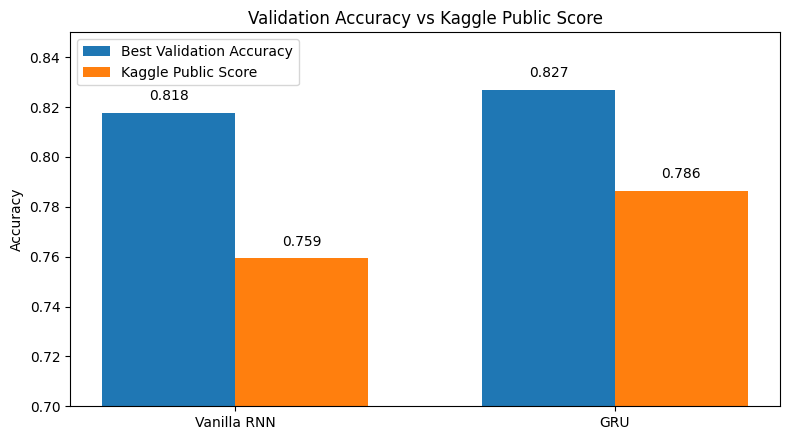

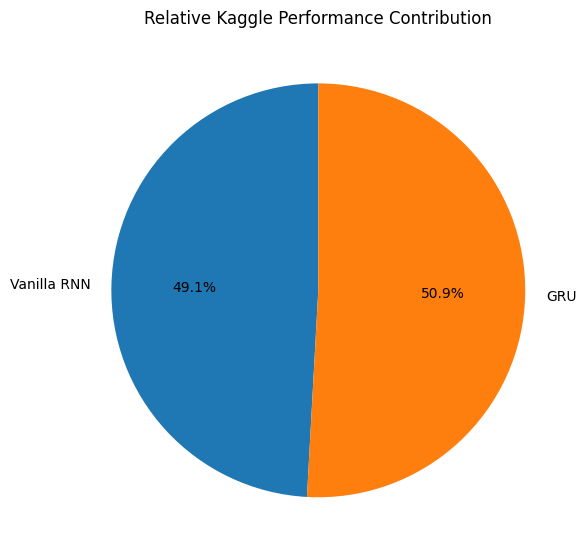

In [105]:
# 4.5 – Model Comparison: Validation vs Kaggle (Visualization)

import pandas as pd
import matplotlib.pyplot as plt

# -------------------------
# DATA (best results)
# -------------------------
data = {
    "Model": ["Vanilla RNN", "GRU"],
    "Best_Validation_Accuracy": [0.8178, 0.8269],
    "Kaggle_Public_Score": [0.7594, 0.7864],
}

df = pd.DataFrame(data)

# -------------------------
# PLOT 1: Validation vs Kaggle
# -------------------------
plt.figure(figsize=(8, 4.5))

x = range(len(df))
bar_width = 0.35

plt.bar(
    [i - bar_width / 2 for i in x],
    df["Best_Validation_Accuracy"],
    width=bar_width,
    label="Best Validation Accuracy"
)

plt.bar(
    [i + bar_width / 2 for i in x],
    df["Kaggle_Public_Score"],
    width=bar_width,
    label="Kaggle Public Score"
)

plt.xticks(x, df["Model"])
plt.ylim(0.7, 0.85)
plt.ylabel("Accuracy")
plt.title("Validation Accuracy vs Kaggle Public Score")
plt.legend()

# value labels
for i, v in enumerate(df["Best_Validation_Accuracy"]):
    plt.text(i - bar_width / 2, v + 0.005, f"{v:.3f}", ha="center", fontsize=10)

for i, v in enumerate(df["Kaggle_Public_Score"]):
    plt.text(i + bar_width / 2, v + 0.005, f"{v:.3f}", ha="center", fontsize=10)

plt.tight_layout()
plt.show()
# -------------------------
# PLOT 2 (FINAL): Kaggle Performance Share – Pie Chart
# -------------------------

kaggle_scores = df["Kaggle_Public_Score"].values
labels = df["Model"].values

# normalize just for visualization
weights = kaggle_scores / kaggle_scores.sum()

plt.figure(figsize=(6, 6))

plt.pie(
    weights,
    labels=labels,
    autopct=lambda p: f"{p:.1f}%",
    startangle=90
)

plt.title("Relative Kaggle Performance Contribution")
plt.tight_layout()
plt.show()


### 4.6 Troubleshooting

During development, I ran into a few non-obvious issues while implementing both the Vanilla RNN and the GRU in PyTorch. Initially, both models showed clearly degenerate behavior, quickly converging to almost constant predictions and misleading accuracy plateaus. At first this looked like a tuning problem, but it wasn’t.

Long story short, **the culprit was sequence padding and improper handling of variable-length inputs**. The models were effectively using padded timesteps instead of real content when computing the final hidden representations. Once the true sequence lengths were passed explicitly—selecting the last valid hidden state in the Vanilla RNN and using `pack_padded_sequence` in the GRU—everything went right almost immediately and the models started learning as expected.

Beyond implementation details, the dataset itself introduces limitations. The texts are short, often lack context, and in several cases are ambiguous even for a human reader. Under these conditions, targeting accuracies above 90% was never realistic without adding stronger semantic priors or manual feature engineering.

Given this context, final accuracies around 0.78–0.80 are a reasonable and technically sound outcome, reflecting data ambiguity rather than model deficiencies.


### 4.7 Hyperparameter Optimization Procedure Summary

Hyperparameter optimization was performed by iterating over learning rate, batch size, random seed and number of epochs for both the Vanilla RNN and the GRU. Each configuration was evaluated on the validation split, tracking performance at every epoch and applying early stopping to avoid unnecessary computation.

For each model, the top-performing configurations were identified, and the final choice was made following Occam’s razor: when multiple setups achieved very similar accuracy, the simplest and least computationally expensive configuration was selected.

The resulting best configurations are:

* **Vanilla RNN**: batch size 128, learning rate 5e-4, 3 epochs
* **GRU**: batch size 128, learning rate 1e-4, 8 epochs

This approach ensured a fair comparison between models while maintaining a balance between performance, stability and computational efficiency.


## 5. Conclusion

### 5.1 Results Interpretation

The experimental results show that both recurrent architectures are able to learn meaningful patterns from the data and generalize reasonably well to unseen samples.

On the internal validation split, both the Vanilla RNN and the GRU consistently reach accuracies in the 0.80–0.83 range once properly tuned and implemented. When evaluated on the Kaggle test set, which represents a fully unseen benchmark, performance naturally decreases, with the Vanilla RNN achieving a score of 0.76 and the GRU reaching 0.79.

![kaggle submissions](./images/kaggle_results.png)

*kaggle submissions*



This drop in performance is expected and does not indicate overfitting or implementation issues. Instead, it highlights the difference between validation on a controlled split and evaluation on real test data that may contain distribution shifts, additional noise, or ambiguous samples. Importantly, the relative ordering between models is preserved: the GRU shows slightly better generalization on Kaggle, while the Vanilla RNN remains surprisingly competitive given its simplicity.

Overall, these results confirm that the chosen modeling approach is sound and that the observed performance levels are primarily constrained by the characteristics of the dataset rather than by shortcomings of the architectures themselves. The Kaggle scores provide a realistic estimate of achievable performance under these conditions and serve as a reliable external reference for the final model comparison.

### 5.2 Learnings

The biggest learning was that implementation details matter more than model choice. Both RNN and GRU were initially failing for non-obvious reasons, and no amount of tuning helped until sequence lengths were handled correctly and padded timesteps were excluded from the final representation.

Another clear takeaway is that hyperparameter tuning beats architectural complexity. Once batch size and learning rate were set properly, a simple Vanilla RNN reached almost the same performance as a GRU, with faster convergence and lower computational cost.

Early stopping also proved useful in practice: most models peaked very early, making long training runs unnecessary and sometimes misleading.

Finally, inspecting misclassified samples made it clear that part of the error is unavoidable. Many texts are short, ambiguous, or weakly labeled, and even a human reader would struggle in some cases. At that point, the model is no longer the bottleneck.

### 5.3 Takeaways: What Didn’t Work (and What Did)

**What Didn’t Work**

Despite investing a significant amount of time exploring multiple hyperparameter combinations, hyperparameters alone did not make a dramatic difference. Learning rate, batch size, number of epochs and random seed affected stability and convergence speed, but they did not fundamentally change the ceiling of achievable performance. Once reasonable values were found, further fine-tuning mostly produced marginal gains.

Increasing architectural complexity also did not help as much as expected. The GRU slightly outperformed the Vanilla RNN, but the improvement was modest and far from transformative. This suggests that model capacity was not the main limiting factor in this task.


**What did work**

What made the biggest difference was starting from a clean and well-prepared dataset. Careful data cleaning, normalization, and consistent preprocessing were fundamental in allowing the models to learn anything meaningful at all. Without this step, no amount of tuning or architectural changes would have compensated for noisy or inconsistent inputs.

Beyond that, correct implementation and stable training dynamics mattered more than aggressive optimization. Handling variable-length sequences properly, fixing padding-related issues, using early stopping, and keeping the training loop simple and reproducible had a clear positive impact on results.

Finally, understanding the dataset itself proved essential. Many samples are short, ambiguous, or borderline even for a human reader, which naturally limits achievable accuracy. In this context, validation and Kaggle scores around 0.78–0.83 reflect solid learning rather than a lack of optimization.

### 5.4 Improvements and Future Work

To reach the highest positions in this competition (around 0.85 accuracy), it would clearly be necessary to actively help the model beyond plain text encoding. Given the presence of many ambiguous or borderline phrases, additional features are needed to guide the classification toward the correct category.

One effective direction would be to introduce explicit word weighting, assigning stronger influence to terms that are strongly associated with real disasters, such as 'earthquake', 'flood', or 'drown'. At the same time, this would need to be balanced with awareness of composite expressions and word tuples. For example, phrases like 'fire squad' should not be interpreted as disasters, despite containing the word 'fire' which, by itself, it's a disaster bearer if in the right context, but it's also used in slang tweets.

Finally, more sophisticated approaches—such as richer semantic representations, stronger sequence models, or ensemble strategies—would likely provide further gains. These techniques could help resolve edge cases and reduce ambiguity, ultimately pushing performance closer to the top leaderboard scores.

## 6. References

[1] Kaggle. Natural Language Processing with Disaster Tweets.
https://www.kaggle.com/competitions/nlp-getting-started

[2] PyTorch Documentation. Recurrent Neural Networks.
https://pytorch.org/docs/stable/nn.html#recurrent-layers

[3] PyTorch Documentation. pack_padded_sequence.
https://pytorch.org/docs/stable/generated/torch.nn.utils.rnn.pack_padded_sequence.html

[4] Pennington, J., Socher, R., & Manning, C. (2014).
GloVe: Global Vectors for Word Representation.
Proceedings of the 2014 Conference on Empirical Methods in Natural Language Processing (EMNLP).

[5] University of Colorado Boulder. Introduction to Deep Learning - Deep Learning on Sequential data
https://www.coursera.org/learn/introduction-to-deep-learning-boulder-two/home/module/4
